# PHASE 4 GROUP iv PROJECT - TIME SERIES MODELING USING ZILLOW HOUSING DATA 🏘️.
`Student Names:`
  - Silvia Gworit
  - Dennis Mwenda
  - Myra Kadenge
  - Paul Muniu


## **1. BUSINESS UNDERSTANDING.**

### 1.1 Introduction

The global marketplace has witnessed everchanging trends in different industries, and the real estate sector is no exception.To remain relevant and increase profitability in the Real estate market it is advantageous for leading Real Estate companies to study this trends so as to stay ahead. Happy Homes Partners are investors in the real estate market and have acknowledged that data science plays a pivotal role by uncovering hidden investment opportunities and steering clients towards profitable ventures.

### 1.2 Business Problem

Happy Homes Partners is looking to expand their property investments and are looking for optimal locations for their investment. We as Tech to Tech hub have a primary objective to facilitate informed real estate investment decisions for the Happy Homes Partners. Using the extensive housing dataset from Zillow, covering the period from April 1996 to April 2018, the project seeks to pinpoint the top 5 zip codes with the most promising investment potential.

### 1.3 Objectives
a) Main Objective

`Project Question`

What are the top 5 best zip codes for 'Happy Homes Partners' to invest in?

b) Specific Objective

1. To identify and establish the top 5 best performing zipcodes(Regions) with the highest ROI.

2. To develop time series models to forecast real estate prices for different zip codes over various time horizons.

3. To evaluate the performance of time series models using appropriate metrics, ensuring reliability and effectiveness in predicting real estate prices.


## **2. DATA UNDERSTANDING.**

We will be using the Zillow Housing dataset, a CSV file for this project.
The dataset covers a large period from April 1996 to April 2018, allowing us to study long-term trends and different market conditions. It's a valuable resource for analyzing how prices have changed over time and predicting future trends.

### 2.1 Summary of the Dataset

`RegionID` - This is unique Id for the Regions.

`SizeRank` - This is the ranking done based on the size of the Region.

`RegionName` - This field contains the zip code of the Region.

`RegionType` - Type of Region is Zip.

`StateName` - Names of the of the various states.

`City` - This column provide the specific City Name of Housing Data.

`Metro` - This provide the name of the metro city around that Region.

`County Name `- This is the County Name for that Region.

`Months Column` - These Columns contains the prices of Region for every month.

### 2.2 Data Inspection

In [1]:
# import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Warnings
import warnings
from statsmodels.tools.sm_exceptions import ConvergenceWarning
warnings.simplefilter('ignore', ConvergenceWarning)
warnings.filterwarnings('ignore')

#modeling
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.arima.model import ARIMA        
from sklearn.metrics import mean_squared_error, r2_score
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import acf, pacf, adfuller
from sklearn.linear_model import LassoLarsCV
from sklearn.model_selection import TimeSeriesSplit 

In [2]:
# load the datasets
df = pd.read_csv('zillow_data.csv')

# View the first 5 rows
df.head()

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
0,84654,60657,Chicago,IL,Chicago,Cook,1,334200.0,335400.0,336500.0,...,1005500,1007500,1007800,1009600,1013300,1018700,1024400,1030700,1033800,1030600
1,90668,75070,McKinney,TX,Dallas-Fort Worth,Collin,2,235700.0,236900.0,236700.0,...,308000,310000,312500,314100,315000,316600,318100,319600,321100,321800
2,91982,77494,Katy,TX,Houston,Harris,3,210400.0,212200.0,212200.0,...,321000,320600,320200,320400,320800,321200,321200,323000,326900,329900
3,84616,60614,Chicago,IL,Chicago,Cook,4,498100.0,500900.0,503100.0,...,1289800,1287700,1287400,1291500,1296600,1299000,1302700,1306400,1308500,1307000
4,93144,79936,El Paso,TX,El Paso,El Paso,5,77300.0,77300.0,77300.0,...,119100,119400,120000,120300,120300,120300,120300,120500,121000,121500


In [3]:
# View last 5 rows
df.tail()

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
14718,58333,1338,Ashfield,MA,Greenfield Town,Franklin,14719,94600.0,94300.0,94000.0,...,216800,217700,218600,218500,218100,216400,213100,209800,209200,209300
14719,59107,3293,Woodstock,NH,Claremont,Grafton,14720,92700.0,92500.0,92400.0,...,202100,208400,212200,215200,214300,213100,213700,218300,222700,225800
14720,75672,40404,Berea,KY,Richmond,Madison,14721,57100.0,57300.0,57500.0,...,121800,122800,124600,126700,128800,130600,131700,132500,133000,133400
14721,93733,81225,Mount Crested Butte,CO,NaN,Gunnison,14722,191100.0,192400.0,193700.0,...,662800,671200,682400,695600,695500,694700,706400,705300,681500,664400
14722,95851,89155,Mesquite,NV,Las Vegas,Clark,14723,176400.0,176300.0,176100.0,...,333800,336400,339700,343800,346800,348900,350400,353000,356000,357200


In [4]:
# Look at the shape
df.shape

(14723, 272)

Our data has 14723 rows and 272 columns. The data is in a wide Format evident by having, columns 8 onwards being with dates. 

In [5]:
# Looking at more information of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14723 entries, 0 to 14722
Columns: 272 entries, RegionID to 2018-04
dtypes: float64(219), int64(49), object(4)
memory usage: 30.6+ MB


Our data has 14723 entries ranging from 0 to 14722 with 272 columns with 3 main data types
1. 219 columns with floating point numbers
2. 49 columns with interger data types
3. 4 columns with object data types

In [6]:
# descriptive statistics
df.describe()

,RegionID,RegionName,SizeRank,1996-04,1996-05,1996-06,1996-07,1996-08,1996-09,1996-10,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
count,14723.000000,14723.000000,14723.000000,1.368400e+04,1.368400e+04,1.368400e+04,1.368400e+04,1.368400e+04,1.368400e+04,1.368400e+04,...,1.472300e+04,1.472300e+04,1.472300e+04,1.472300e+04,1.472300e+04,1.472300e+04,1.472300e+04,1.472300e+04,1.472300e+04,1.472300e+04
mean,81075.010052,48222.348706,7362.000000,1.182991e+05,1.184190e+05,1.185374e+05,1.186531e+05,1.187803e+05,1.189275e+05,1.191205e+05,...,2.733354e+05,2.748658e+05,2.764646e+05,2.780332e+05,2.795209e+05,2.810953e+05,2.826571e+05,2.843687e+05,2.865114e+05,2.880399e+05
std,31934.118525,29359.325439,4250.308342,8.600251e+04,8.615567e+04,8.630923e+04,8.646795e+04,8.665094e+04,8.687208e+04,8.715185e+04,...,3.603984e+05,3.614678e+05,3.627563e+05,3.644610e+05,3.656003e+05,3.670454e+05,3.695727e+05,3.717739e+05,3.724612e+05,3.720544e+05
min,58196.000000,1001.000000,1.000000,1.130000e+04,1.150000e+04,1.160000e+04,1.180000e+04,1.180000e+04,1.200000e+04,1.210000e+04,...,1.440000e+04,1.450000e+04,1.470000e+04,1.480000e+04,1.450000e+04,1.430000e+04,1.410000e+04,1.390000e+04,1.380000e+04,1.380000e+04
25%,67174.500000,22101.500000,3681.500000,6.880000e+04,6.890000e+04,6.910000e+04,6.920000e+04,6.937500e+04,6.950000e+04,6.960000e+04,...,1.269000e+05,1.275000e+05,1.282000e+05,1.287000e+05,1.292500e+05,1.299000e+05,1.306000e+05,1.310500e+05,1.319500e+05,1.324000e+05
50%,78007.000000,46106.000000,7362.000000,9.950000e+04,9.950000e+04,9.970000e+04,9.970000e+04,9.980000e+04,9.990000e+04,9.995000e+04,...,1.884000e+05,1.896000e+05,1.905000e+05,1.914000e+05,1.925000e+05,1.934000e+05,1.941000e+05,1.950000e+05,1.967000e+05,1.981000e+05
75%,90920.500000,75205.500000,11042.500000,1.432000e+05,1.433000e+05,1.432250e+05,1.432250e+05,1.435000e+05,1.437000e+05,1.439000e+05,...,3.050000e+05,3.066500e+05,3.085000e+05,3.098000e+05,3.117000e+05,3.134000e+05,3.151000e+05,3.168500e+05,3.188500e+05,3.211000e+05
max,753844.000000,99901.000000,14723.000000,3.676700e+06,3.704200e+06,3.729600e+06,3.754600e+06,3.781800e+06,3.813500e+06,3.849600e+06,...,1.888990e+07,1.870350e+07,1.860530e+07,1.856940e+07,1.842880e+07,1.830710e+07,1.836590e+07,1.853040e+07,1.833770e+07,1.789490e+07


## **3.DATA PREPARATION.**
### 3.1 Data Cleaning

In [7]:
# Convert Wide Format to Long format and checking on the first five rows
df = pd.melt(df,
                  id_vars=['RegionID', 'RegionName', 'City', 'State', 'Metro', 'CountyName', 'SizeRank'],
                  var_name='Date',
                  value_name='Value')

df.head()

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,Date,Value
0,84654,60657,Chicago,IL,Chicago,Cook,1,1996-04,334200.0
1,90668,75070,McKinney,TX,Dallas-Fort Worth,Collin,2,1996-04,235700.0
2,91982,77494,Katy,TX,Houston,Harris,3,1996-04,210400.0
3,84616,60614,Chicago,IL,Chicago,Cook,4,1996-04,498100.0
4,93144,79936,El Paso,TX,El Paso,El Paso,5,1996-04,77300.0


**Duplicates and Missing Values.**

In [8]:
# Helper function to check for duplicates and Missing Values
class DataFrameChecker:
    def __init__(self, data):
        
        self.data = data

    def check_duplicates(self):
        
        duplicates = self.data.duplicated().any()
        return duplicates

    def check_missing_values(self):
        
        missing_values = self.data.isnull().values.any()
        return missing_values
    
checker = DataFrameChecker(df)

# Check for duplicates and missing values
duplicates = checker.check_duplicates()
missing_values = checker.check_missing_values()

if duplicates:
    print("Duplicates found in the DataFrame.")
else:
    print("No duplicates found in the DataFrame.")

if missing_values:
    print("Missing values (NaNs) found in the DataFrame.")
else:
    print("No missing values (NaNs) found in the DataFrame.")

No duplicates found in the DataFrame.
Missing values (NaNs) found in the DataFrame.


In [9]:
df.isnull().sum()

RegionID           0
RegionName         0
City               0
State              0
Metro         276395
CountyName         0
SizeRank           0
Date               0
Value         156891
dtype: int64

In [10]:
# checking for percentage of missing values
df.isnull().mean() * 100

RegionID      0.000000
RegionName    0.000000
City          0.000000
State         0.000000
Metro         7.084154
CountyName    0.000000
SizeRank      0.000000
Date          0.000000
Value         4.021202
dtype: float64

In [11]:
# Dropping the "Metro" column - less significant
df.drop('Metro', axis=1, inplace=True)

In [12]:
df = df.dropna(subset= ['Value'])
df.isnull().sum()

RegionID      0
RegionName    0
City          0
State         0
CountyName    0
SizeRank      0
Date          0
Value         0
dtype: int64

In [13]:
# Checking for placeholders
# Comprehensive list of potential placeholder values
common_placeholders = ["", "na", "n/a", "nan", "none", "null", "-", "--", "?", "??", "unknown", "missing", "void", "empty","#","#####"]

# Loop through each column and check for potential placeholders

found_placeholder = False
for column in df.columns:
  unique_values = df[column].unique()
  for value in unique_values:
    if pd.isna(value) or (isinstance(value, str) and value.strip().lower() in common_placeholders):
      count = (df[column] == value).sum()
      print(f"Column '{column}': Found {count} occurrences of potential placeholder{value}")

      found_placeholder = True

if not found_placeholder:
  print("No potential placeholders found in the DataFrame.")

No potential placeholders found in the DataFrame.


**Renaming and convertion.**

In [14]:
#Renaming RegionName to ZipCode
df.rename(columns={'RegionName': 'ZipCode'}, inplace=True)

In [15]:
# Convert 'Date' column to datetime
df.loc[:, 'Date'] =pd.to_datetime(df['Date']).dt.date


### **Feature Engineering: Return on Investment (ROI)**

Feature engineering is a crucial step in the data preprocessing. It involves creating new features or modifying existing ones to improve the performance of machine learning model. In this project, we'll calculate the Return on Investment (ROI) as part of our feature engineering process.

Return on Investment (ROI) measures the profitability or growth of an investment over time.

`Formula`
  = {(Final Value - Initial Value/ Initial Value)} *100


In [16]:
# Calc. initial and final values for each ZipCode
initial_values = df.groupby('ZipCode').first()['Value']
final_values = df.groupby('ZipCode').last()['Value']

# Calc. ROI for each ZipCode
roi = (final_values - initial_values) / initial_values * 100

# Create a DataFrame to display ROI
roi_df = pd.DataFrame({
    'ZipCode': roi.index,
    'Initial Value': initial_values.values,
    'Final Value': final_values.values,
    'ROI (%)': roi.values
})

roi_df.sample(5, random_state=42)

,ZipCode,Initial Value,Final Value,ROI (%)
3077,19014,127400.0,232500.0,82.496075
8864,55352,92000.0,274500.0,198.369565
1799,12062,88000.0,197900.0,124.886364
11679,78245,89200.0,167700.0,88.004484
14422,98126,143900.0,641400.0,345.726199


In [17]:
# Merge the ROI column to the df dataset
data = pd.merge(df, roi_df)
data.head()

,RegionID,ZipCode,City,State,CountyName,SizeRank,Date,Value,Initial Value,Final Value,ROI (%)
0,84654,60657,Chicago,IL,Cook,1,1996-04-01,334200.0,334200.0,1030600.0,208.378217
1,84654,60657,Chicago,IL,Cook,1,1996-05-01,335400.0,334200.0,1030600.0,208.378217
2,84654,60657,Chicago,IL,Cook,1,1996-06-01,336500.0,334200.0,1030600.0,208.378217
3,84654,60657,Chicago,IL,Cook,1,1996-07-01,337600.0,334200.0,1030600.0,208.378217
4,84654,60657,Chicago,IL,Cook,1,1996-08-01,338500.0,334200.0,1030600.0,208.378217


**Checking for outliers.**


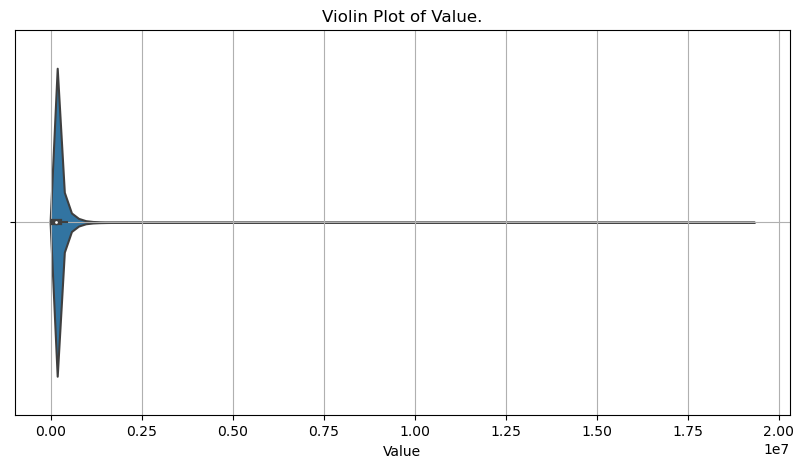

In [18]:
plt.figure(figsize=(10, 5))
sns.violinplot(x=data['Value'])
plt.title('Violin Plot of Value.')
plt.xlabel('Value')
plt.grid(True)
plt.show();

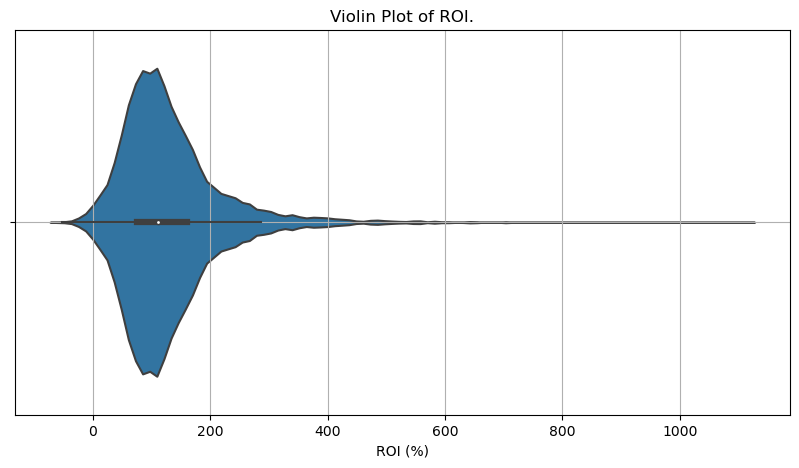

In [19]:
plt.figure(figsize=(10, 5))
sns.violinplot(x=data['ROI (%)'])
plt.title('Violin Plot of ROI.')
plt.xlabel('ROI (%)')
plt.grid(True)
plt.show();


The dataset indicates that some zip codes exhibit a limited number of outliers in their price data. These outliers may, in fact, represent accurate reflections of the actual market prices in those particular regions.

### **The top 5 zip codes with the highest ROI.**

In [20]:
# Identify the top 5 zip codes with the highest ROI
top_5_zipcodes = roi_df.nlargest(5, 'ROI (%)')
top_5_zipcodes

,ZipCode,Initial Value,Final Value,ROI (%)
1565,11211,133200.0,1623700.0,1118.993994
1575,11222,149200.0,1721100.0,1053.552279
1569,11216,146100.0,1598700.0,994.250513
993,7302,137200.0,1427300.0,940.306122
1568,11215,225700.0,2243900.0,894.195835


In [21]:
data.columns

Index(['RegionID', 'ZipCode', 'City', 'State', 'CountyName', 'SizeRank',
       'Date', 'Value', 'Initial Value', 'Final Value', 'ROI (%)'],
      dtype='object')

In [22]:
data.shape

(3744704, 11)

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3744704 entries, 0 to 3744703
Data columns (total 11 columns):
 #   Column         Dtype  
---  ------         -----  
 0   RegionID       int64  
 1   ZipCode        int64  
 2   City           object 
 3   State          object 
 4   CountyName     object 
 5   SizeRank       int64  
 6   Date           object 
 7   Value          float64
 8   Initial Value  float64
 9   Final Value    float64
 10  ROI (%)        float64
dtypes: float64(4), int64(3), object(4)
memory usage: 314.3+ MB


In [24]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
RegionID,3744704.0,81016.946026,32254.359507,58196.000000,66953.000000,77920.000000,91045.000000,7.538440e+05
ZipCode,3744704.0,48008.891124,29593.750807,1001.000000,21635.000000,45827.000000,75473.000000,9.990100e+04
SizeRank,3744704.0,7243.785280,4237.745891,1.000000,3572.000000,7179.000000,10883.000000,1.472300e+04
Value,3744704.0,207606.383121,240020.726819,11300.000000,97900.000000,147600.000000,237200.000000,1.931490e+07
Initial Value,3744704.0,120181.808976,135686.447509,11300.000000,69100.000000,99800.000000,143600.000000,1.392280e+07
Final Value,3744704.0,292150.026277,358376.133801,13800.000000,135200.000000,202400.000000,326800.000000,1.789490e+07
ROI (%),3744704.0,129.133206,87.609298,-64.124943,75.210356,111.657559,159.882006,1.118994e+03


In [25]:
#statistical description of categorical variables
data.describe(include=['object'])

,City,State,CountyName,Date
count,3744704,3744704,3744704,3744704
unique,7554,51,1212,265
top,New York,CA,Los Angeles,2018-04-01
freq,29058,318744,69375,14723


### 3.2 Resampling

(a) Monthly data

In [26]:
# Extract year
data['Date'] = pd.to_datetime(data['Date'], format='%Y-%m')
data['Year'] = data['Date'].dt.year

# Group by year and calculate mean
df_monthly = data.groupby(['RegionID', 'ZipCode', 'City', 'State', 'CountyName', 'SizeRank', 'Date']).agg({'Value': 'mean', 'ROI (%)': 'mean'}).reset_index()

# Extract year and quarter
df_monthly['year'] = df_monthly['Date'].dt.year
df_monthly['quarter'] = df_monthly['Date'].dt.quarter

# Group by year, quarter, and other columns, then calculate mean
df_quarterly = df_monthly.groupby(['RegionID', 'ZipCode', 'City', 'State', 'CountyName', 'SizeRank', 'year', 'quarter']).agg({'Value': 'mean', 'ROI (%)': 'mean'}).reset_index()

# Display the result
df_quarterly

# Set the 'Date' column as the index
df_monthly.set_index('Date', inplace=True)

# Sort the DataFrame by the datetime index
df_monthly.sort_index(inplace=True)

# Display the DataFrame to verify the changes
df_monthly.head()

,RegionID,ZipCode,City,State,CountyName,SizeRank,Value,ROI (%),year,quarter
Date,,,,,,,,,,
1996-04-01,58196,1001,Agawam,MA,Hampden,5851,113100.0,97.701149,1996,2
1996-04-01,92329,78233,San Antonio,TX,Bexar,987,85700.0,85.997666,1996,2
1996-04-01,92334,78238,San Antonio,TX,Bexar,4303,81800.0,85.330073,1996,2
1996-04-01,62283,11932,Bridgehampton,NY,Suffolk,12615,313200.0,727.618135,1996,2
1996-04-01,92335,78239,Windcrest,TX,Bexar,3697,85200.0,75.352113,1996,2


(b) Quaterly data

In [27]:
# Extract year and quarter
df_monthly['year'] = df_monthly.index.year
df_monthly['quarter'] = df_monthly.index.quarter

# Group by year, quarter, and other columns, then calculate mean
df_quarterly = df_monthly.groupby(['RegionID', 'ZipCode', 'City', 'State', 'CountyName', 'SizeRank', 'year', 'quarter']).agg({'Value': 'mean', 'ROI (%)': 'mean'}).reset_index()

# Display the result
df_quarterly.head()

,RegionID,ZipCode,City,State,CountyName,SizeRank,year,quarter,Value,ROI (%)
0,58196,1001,Agawam,MA,Hampden,5851,1996,2,112833.333333,97.701149
1,58196,1001,Agawam,MA,Hampden,5851,1996,3,112100.000000,97.701149
2,58196,1001,Agawam,MA,Hampden,5851,1996,4,111733.333333,97.701149
3,58196,1001,Agawam,MA,Hampden,5851,1997,1,112100.000000,97.701149
4,58196,1001,Agawam,MA,Hampden,5851,1997,2,112766.666667,97.701149


(c) Yearly data

In [28]:
# Extract year
data['Year'] = data['Date'].dt.year

# Group by year and calculate mean
df_yearly = data.groupby(['RegionID', 'ZipCode', 'City', 'State', 'CountyName', 'SizeRank', 'Year']).agg({'Value': 'mean', 'ROI (%)': 'mean'}).reset_index()

# Display the result
df_yearly.head()

,RegionID,ZipCode,City,State,CountyName,SizeRank,Year,Value,ROI (%)
0,58196,1001,Agawam,MA,Hampden,5851,1996,112222.222222,97.701149
1,58196,1001,Agawam,MA,Hampden,5851,1997,113241.666667,97.701149
2,58196,1001,Agawam,MA,Hampden,5851,1998,116516.666667,97.701149
3,58196,1001,Agawam,MA,Hampden,5851,1999,120200.000000,97.701149
4,58196,1001,Agawam,MA,Hampden,5851,2000,126225.000000,97.701149


## 4. Exploratory Data Analysis.

This section focuses on visualizing popular counties, cities, and states, while analyzing housing prices in various states and the return on investment (ROI) for the five top-performing zip codes 

### (a) Univariate analysis.




- Top 10 Most Popular Counties

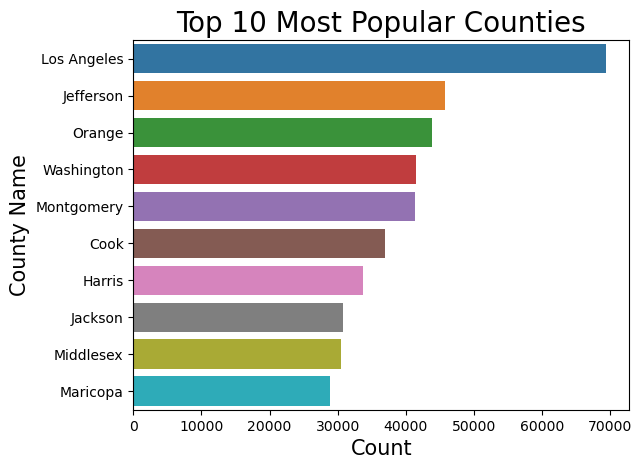

In [29]:
# plotting the most popular counties in the dataset
sns.countplot(y='CountyName', data=data, order=data['CountyName'].value_counts().index[:10])
plt.xlabel("Count",fontsize=15)
plt.ylabel("County Name",fontsize=15)
plt.title("Top 10 Most Popular Counties",fontsize=20);

Based on the bar graph above, it is evident that Los Angeles is the most popular county, featuring approximately 70,000 zip codes. In contrast, most other counties have zip code counts ranging from 30,000 to 50,000.

- Top 10 Most Popular Cities.

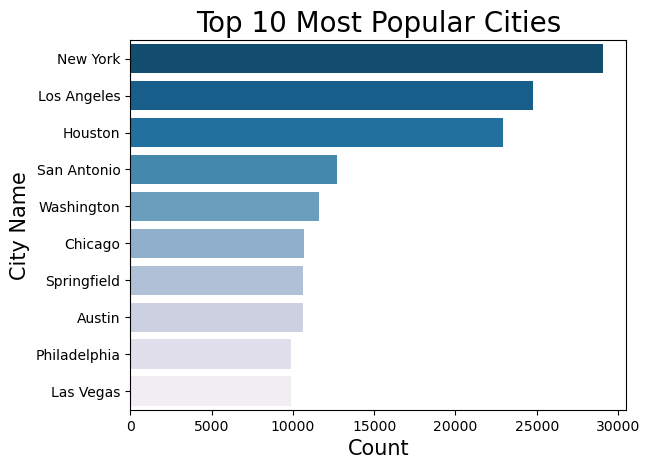

In [30]:
# plotting the most popular counties in the dataset
sns.countplot(y='City', data=data, order=data['City'].value_counts().index[:10], palette='PuBu_r')
plt.xlabel("Count",fontsize=15)
plt.ylabel("City Name",fontsize=15)
plt.title("Top 10 Most Popular Cities",fontsize=20);

From the dataset, we can conclude that New York City, Los Angeles, and Houston are the most popular cities.

- Average house prices by state.

This is done using the groupby function on the house values.

<Axes: xlabel='Value', ylabel='State'>

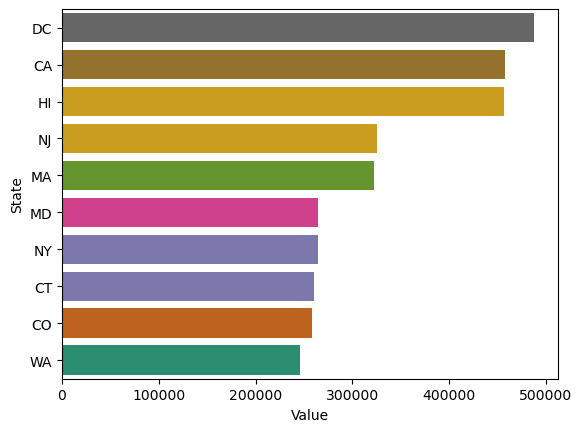

In [31]:
state_group = data.groupby('State')['Value'].agg('mean').sort_values(ascending=False).head(10)

sns.barplot(data=state_group.reset_index(), x='Value', y='State', palette='Dark2_r')

## 2. Bivariate analysis

- Top states based on average Value over the years

The cell below visualizes top states with the highest property valuve over a period of time.

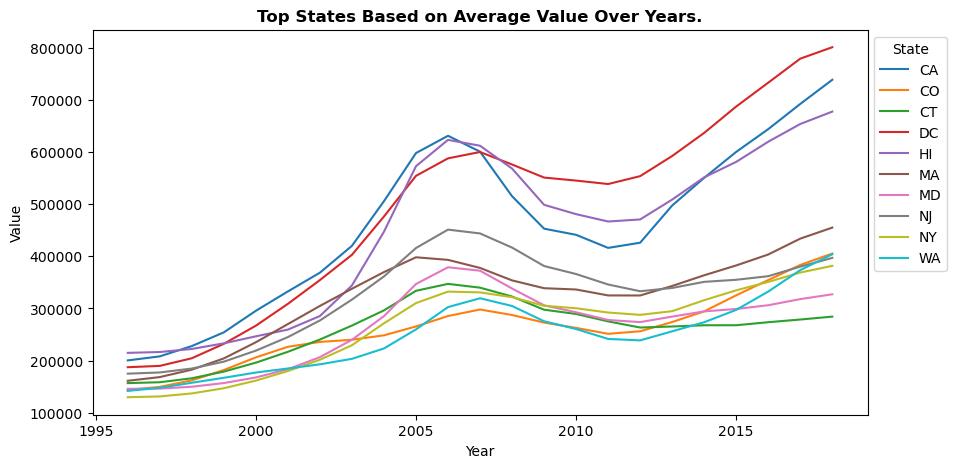

In [32]:
# Calculate average prices by state
average_value_by_state = data.groupby(['Year', 'State'])['Value'].mean().reset_index()

# Get top states based on average prices
top_states = average_value_by_state.groupby('State')['Value'].mean().sort_values(ascending=False).head(10).index

# Filter the DataFrame to include only top states
df_top_states = average_value_by_state[average_value_by_state['State'].isin(top_states)]

# Plotting the data
plt.figure(figsize=(10, 5))
sns.lineplot(x='Year', y='Value', hue='State', data=df_top_states, ci=None)
plt.title('Top States Based on Average Value Over Years.', weight = 'bold')
plt.legend(title='State', bbox_to_anchor=(1, 1))
plt.show();

California, District of Columbia ,and Hawaii exhibit significant increases, indicating a strong property value growth. Other states like Colorado, New Jersey, and New York demonstrate moderate but steady growth over the years. 

- Average housing Value over the years.

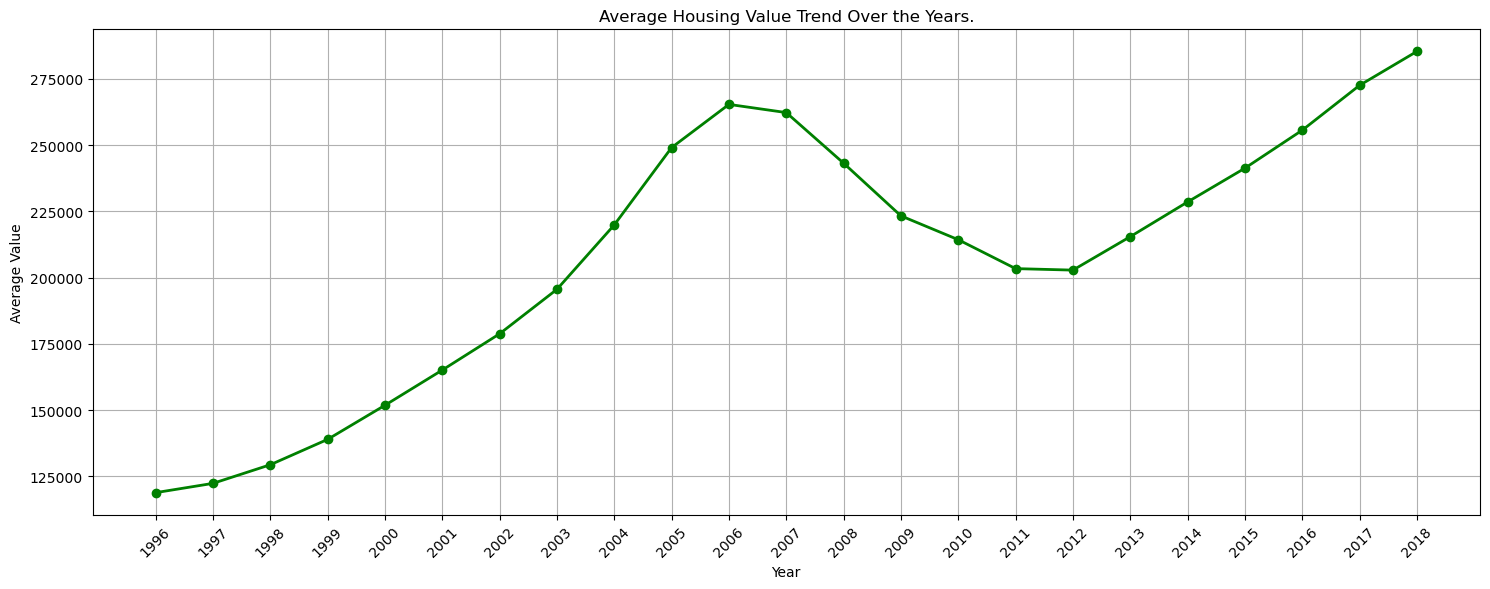

In [33]:
# Calc. average Value per year
data['Year'] = data['Date'].dt.year
average_value = data.groupby('Year')['Value'].mean()
# Creating a figure and axis
fig, ax = plt.subplots(figsize=(15, 6))
# Ploting the data
ax.plot(average_value.index, average_value.values, label='Average Price', color='green', linewidth=2, marker='o')
ax.set_xlabel('Year')
ax.set_ylabel('Average Value')
ax.set_title('Average Housing Value Trend Over the Years.')
ax.grid(True)
plt.xticks(average_value.index, rotation=45)
plt.tight_layout()
plt.show();

The plot reveals a steady growth in housing values from 1999 up to 2007. This growth was largely due to subprime mortgages given to low-income earners. However, from 2008 onwards, there was a noticeable drop in housing values. This period marked the housing market crash of 2008, caused by subprime mortgages, huge debts, and low regulation in the financial sector.

As outlined in [https://www.investopedia.com/articles/economics/09/subprime-market-2008.asp],US was faced with a financial crisis when the housing system collapsed and value of house prices plummuted; many homeowners and investors struggled to keep up with their mortgages. The US faced a financial crisis as the housing system collapsed. Despite the drop between 2007 and 2011, the average housing price has been increasing steadily since then.


#### Top 5 ZipCode Areas with High Growth Rates.

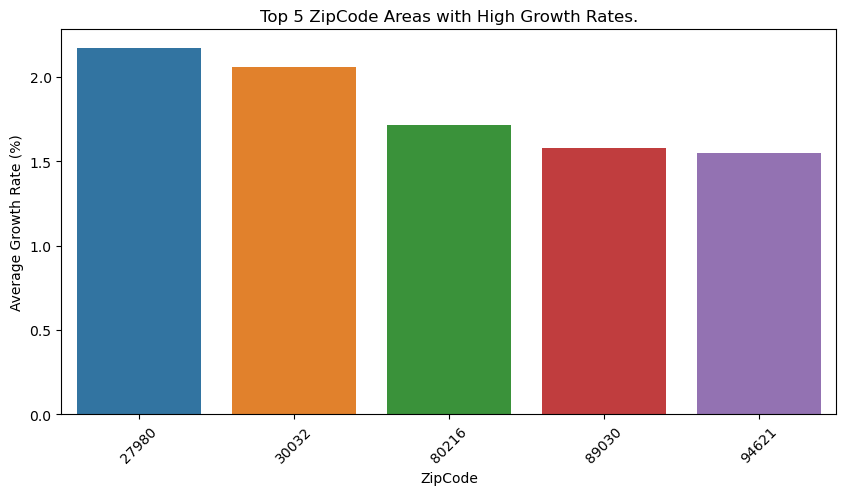

In [34]:
# Calculate the growth rate for various Zipcodes (Regions)
data['GrowthRate'] = data.groupby('ZipCode')['Value'].pct_change() * 100

# Average growth rate and top 5 ZipCodes
average_pct_change = data.groupby('ZipCode')['GrowthRate'].mean().sort_values(ascending=False).head(5).reset_index()

# Plotting
plt.figure(figsize=(10,5))
sns.barplot(data=average_pct_change, x='ZipCode', y='GrowthRate')
plt.title("Top 5 ZipCode Areas with High Growth Rates.")
plt.xlabel("ZipCode")
plt.ylabel("Average Growth Rate (%)")
plt.xticks(rotation=45)
plt.show();


##### Top and Bottom 5 Zipcodes - based on ROI.

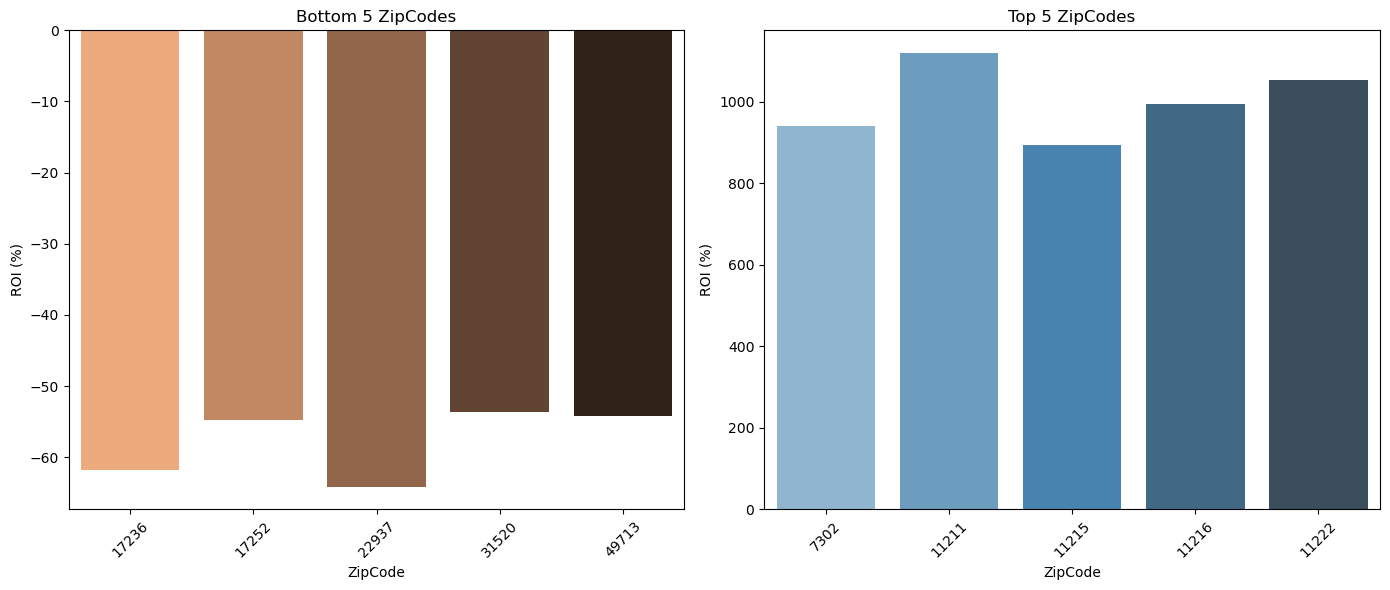

In [35]:
# Select the top 5 and bottom ZipCodes based on ROI
top_5_smallest_zipcodes = roi_df.nsmallest(5, 'ROI (%)')
top_5_largest_zipcodes = roi_df.nlargest(5, 'ROI (%)')

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plot the top 5 smallest ROI values
sns.barplot(ax=axes[0], data=top_5_smallest_zipcodes, x='ZipCode', y='ROI (%)', palette='copper_r')
axes[0].set_title("Bottom 5 ZipCodes")
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45)

# Plot the top 5 largest ROI values
sns.barplot(ax=axes[1], data=top_5_largest_zipcodes, x='ZipCode', y='ROI (%)', palette='Blues_d')
axes[1].set_title("Top 5 ZipCodes")
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45)

plt.tight_layout()
plt.show();

## **5. Data Preprocessing.**

In time series analysis, ensuring that the data is stationary is a fundamental step. Stationarity means that the statistical properties of the time series, such as mean, variance, and autocorrelation, are consistent over time. This is crucial for developing reliable and accurate time series models.

- Our initial focus is on preparing the data by:

Cleaning: Removing unnecessary columns and setting the appropriate date index.
Time Series Creation: Generating individual time series datasets for each zip code, ensuring monthly frequency, and addressing any missing values.
- Stationarity Assessment:

To verify the stationarity of the time series data, we will employ the following techniques:

(a) Dickey-Fuller Test: This statistical test will be used to determine if a unit root is present, which indicates non-stationarity. A significant p-value suggests that the data is stationary.

(b) Rolling Mean Analysis: We will calculate the rolling mean over a sliding window to observe any fluctuations. Non-stationary data will show varying rolling means over time.
- Handling Non-Stationarity:

If the data is found to be non-stationary, we will apply differencing. This involves computing the difference between consecutive observations to stabilize the mean of the time series, transforming it into a stationary form suitable for further modeling.
This approach will prepare the data for robust and effective time series modeling in subsequent phases of the project.

In [36]:
# Filter data for the top 5 zipcodes based on %ROI
top_zipcodes = pd.merge(data, top_5_zipcodes)
top_zipcodes.head(5)

,RegionID,ZipCode,City,State,CountyName,SizeRank,Date,Value,Initial Value,Final Value,ROI (%),Year,GrowthRate
0,62026,11215,New York,NY,Kings,107,1996-04-01,225700.0,225700.0,2243900.0,894.195835,1996,NaN
1,62026,11215,New York,NY,Kings,107,1996-05-01,227500.0,225700.0,2243900.0,894.195835,1996,0.797519
2,62026,11215,New York,NY,Kings,107,1996-06-01,229400.0,225700.0,2243900.0,894.195835,1996,0.835165
3,62026,11215,New York,NY,Kings,107,1996-07-01,231600.0,225700.0,2243900.0,894.195835,1996,0.959024
4,62026,11215,New York,NY,Kings,107,1996-08-01,234100.0,225700.0,2243900.0,894.195835,1996,1.079447


In [37]:
top_zipcodes.tail()

,RegionID,ZipCode,City,State,CountyName,SizeRank,Date,Value,Initial Value,Final Value,ROI (%),Year,GrowthRate
1320,62033,11222,New York,NY,Kings,1156,2017-12-01,1651200.0,149200.0,1721100.0,1053.552279,2017,0.431847
1321,62033,11222,New York,NY,Kings,1156,2018-01-01,1661800.0,149200.0,1721100.0,1053.552279,2018,0.641957
1322,62033,11222,New York,NY,Kings,1156,2018-02-01,1672800.0,149200.0,1721100.0,1053.552279,2018,0.661933
1323,62033,11222,New York,NY,Kings,1156,2018-03-01,1694000.0,149200.0,1721100.0,1053.552279,2018,1.267336
1324,62033,11222,New York,NY,Kings,1156,2018-04-01,1721100.0,149200.0,1721100.0,1053.552279,2018,1.599764


In [38]:
# Counter-check the no. of zipcodes
zipcodes = np.array(top_zipcodes['ZipCode'].unique())
print(f"{top_zipcodes['ZipCode'].nunique()} Zipcodes.")
zipcodes

5 Zipcodes.


array([11215, 11211,  7302, 11216, 11222], dtype=int64)

In [39]:
top_zipcodes.shape

(1325, 13)

Creating individualized time series for each zip code

In [40]:
df_zip = top_zipcodes.drop(columns=['RegionID', 'SizeRank', 'City', 'State','CountyName'])
df_zip = df_zip.set_index('Date')

# Create individualized time series for each zip code
# list containing the top 5 time series.
zipcodes = [11211, 11222, 11216, 7302, 11215]
df_ts = []
for zipcode in zipcodes:
    # Create separate dataframes for each zipcode with a monthly frequency
    df_model = df_zip[df_zip['ZipCode'] == zipcode].asfreq('MS')
    df_model['GrowthRate'] = df_model['GrowthRate'].fillna(method='bfill')
    df_ts.append(df_model)
    print(f'\nZip code {zipcode} time series ***')
    print(df_model.head())


Zip code 11211 time series ***
            ZipCode     Value  Initial Value  Final Value      ROI (%)  Year  \
Date                                                                           
1996-04-01    11211  133200.0       133200.0    1623700.0  1118.993994  1996   
1996-05-01    11211  132900.0       133200.0    1623700.0  1118.993994  1996   
1996-06-01    11211  132500.0       133200.0    1623700.0  1118.993994  1996   
1996-07-01    11211  132200.0       133200.0    1623700.0  1118.993994  1996   
1996-08-01    11211  131800.0       133200.0    1623700.0  1118.993994  1996   

            GrowthRate  
Date                    
1996-04-01   -0.225225  
1996-05-01   -0.225225  
1996-06-01   -0.300978  
1996-07-01   -0.226415  
1996-08-01   -0.302572  

Zip code 11222 time series ***
            ZipCode     Value  Initial Value  Final Value      ROI (%)  Year  \
Date                                                                           
1996-04-01    11222  149200.0       1492

##### Visualize Time Series for each ZipCode.

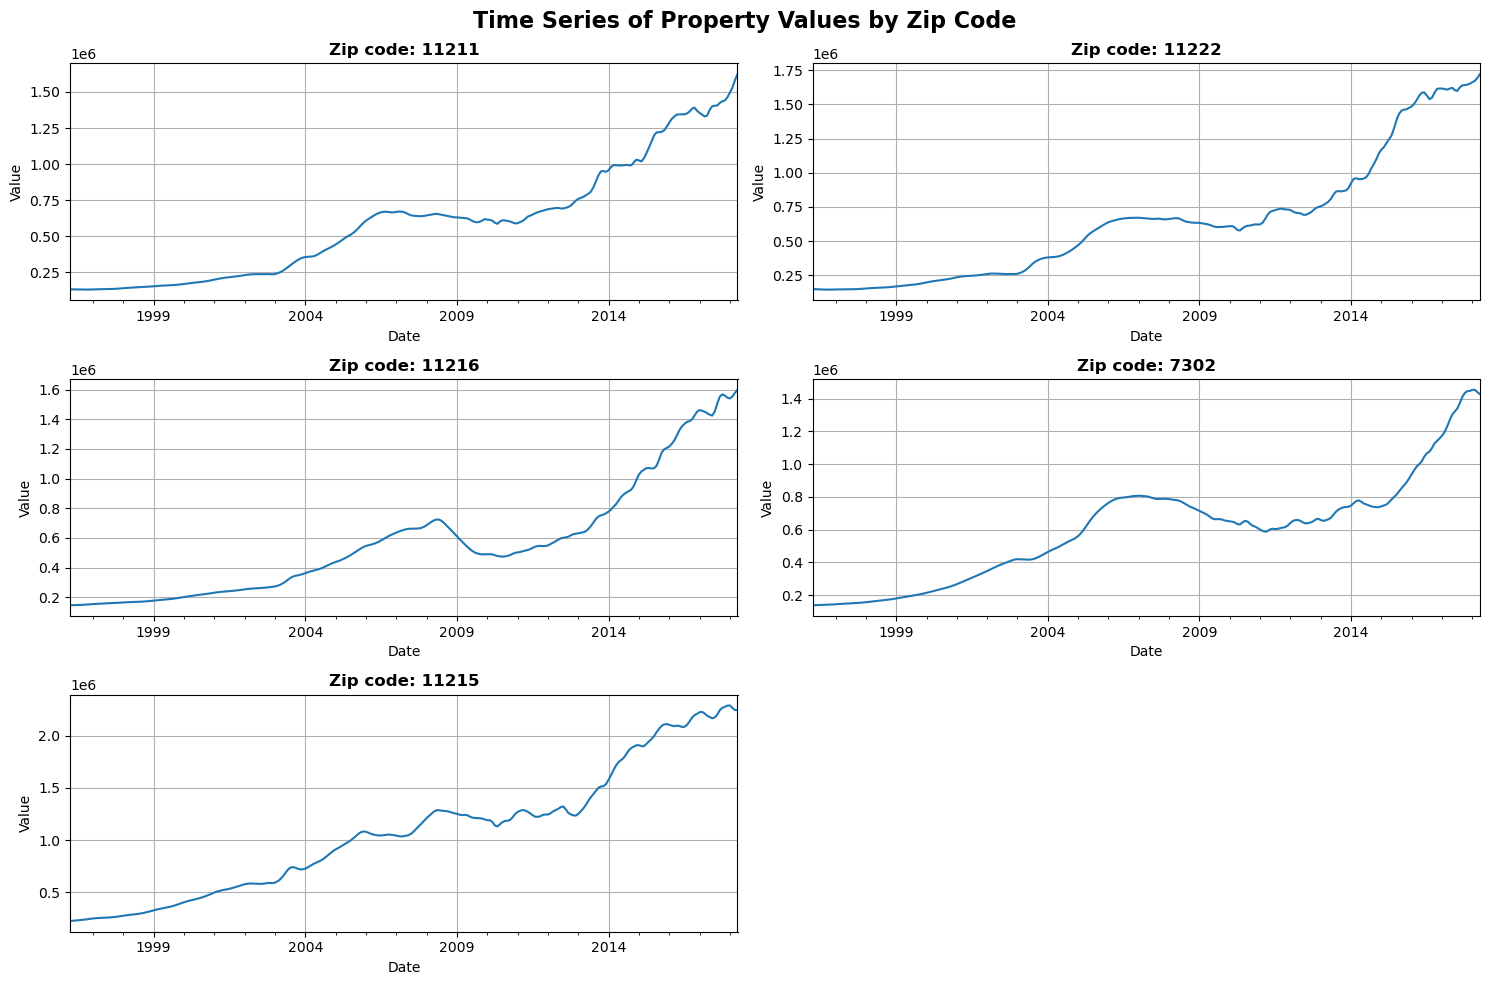

In [41]:
# Create the subplots
plt.figure(figsize=(15, 10))
plt.suptitle('Time Series of Property Values by Zip Code', fontsize=16, weight='bold')

for index, zipcode in enumerate(zipcodes):
    plt.subplot(3, 2, index+1)
    df_ts[index]['Value'].plot()
    plt.title(f'Zip code: {zipcode}', weight='bold')
    plt.xlabel('Date')
    plt.ylabel('Value')
    plt.grid(True)

plt.tight_layout()
plt.show();


> #### Rolling Statistics
We calculate the rolling mean and standard deviation and plot them along with the original time series to visually inspect stationarity.


Analyzing Zip code: 11211


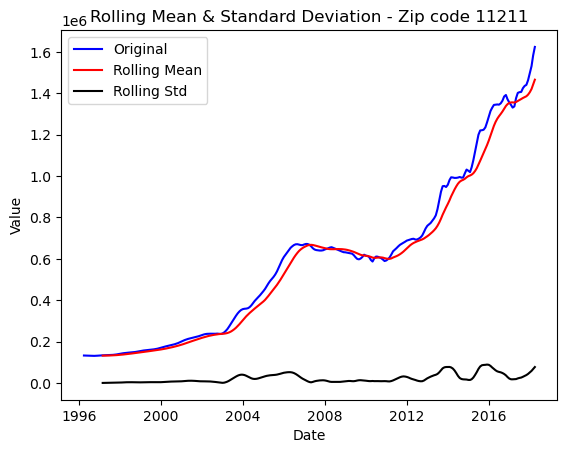


Analyzing Zip code: 11222


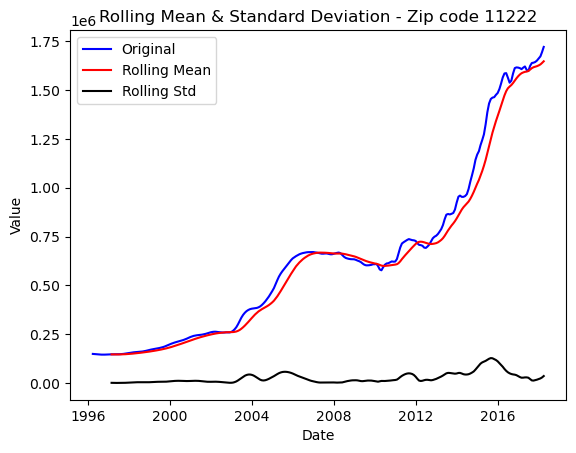


Analyzing Zip code: 11216


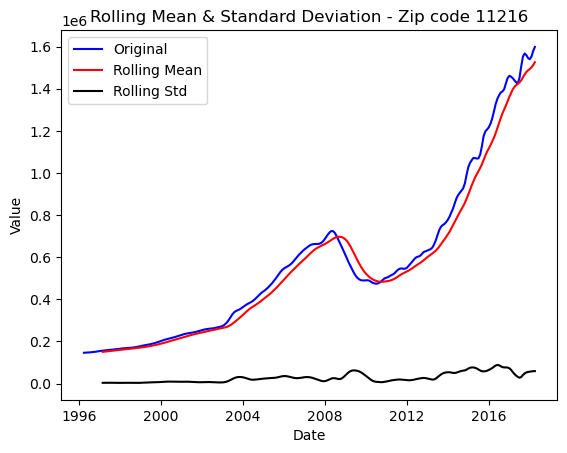


Analyzing Zip code: 7302


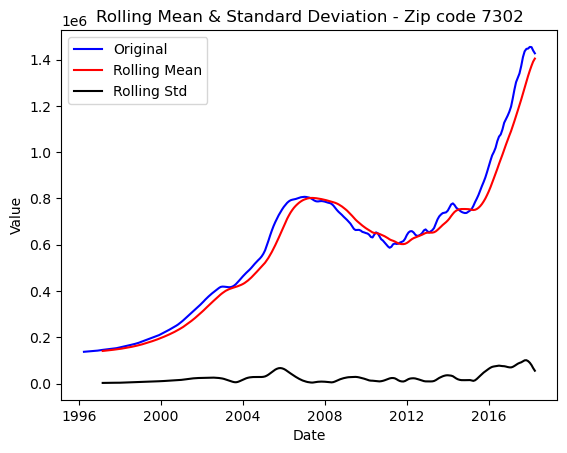


Analyzing Zip code: 11215


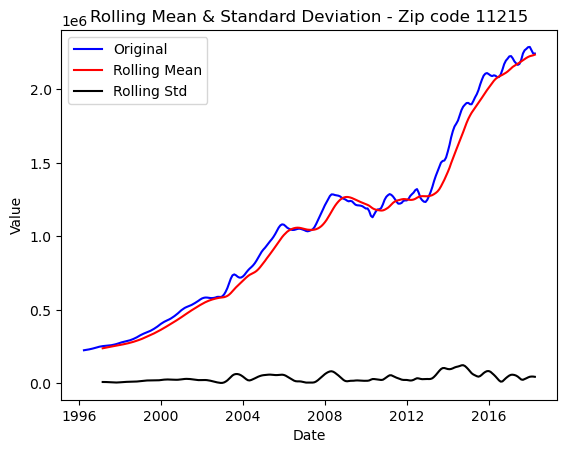

In [42]:
# Helper Function to plot rolling statistics
def plot_rolling_statistics(time_series, title):
    rolmean = time_series.rolling(window=12).mean()
    rolstd = time_series.rolling(window=12).std()

    plt.plot(time_series, color='blue', label='Original')
    plt.plot(rolmean, color='red', label='Rolling Mean')
    plt.plot(rolstd, color='black', label='Rolling Std')
    plt.legend(loc='best')
    plt.title(f'Rolling Mean & Standard Deviation - {title}')
    plt.xlabel('Date')
    plt.ylabel('Value')
    plt.show();

# Iteration over each zip code's time series data
for index, zipcode in enumerate(zipcodes):
    print(f'\nAnalyzing Zip code: {zipcode}')
    time_series = df_ts[index]['Value']
    
    # Plot rolling statistics
    plot_rolling_statistics(time_series, f'Zip code {zipcode}')

- From the graphs above there are some states that exhibit non-stationarity
but to be certain, an Augmented Dickey Fuller test is performed to make a clear picture of it.

> #### Augmented Dickey-Fuller Test
We perform the ADF test to statistically check for stationarity.

In [43]:
# Helper Function to perform Augmented Dickey-Fuller test
def adf_test(time_series):
    result = adfuller(time_series.dropna())
    print('ADF Statistic:', result[0])
    print('p-value:', result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print(f'   {key}: {value}')
    if result[1] > 0.05:
        print(f'Fail to reject the null hypothesis. (p-value is greater than 0.05) hence Data is not stationary.\n')
    else:
        print(f'Reject the null hypothesis. (p-value is less than 0.05) hence Data is stationary.\n')
    print('-' * 50)  

# Iteration over each zip code's time series data
for index, zipcode in enumerate(zipcodes):
    time_series = df_ts[index]['Value']
    
    # Augmented Dickey-Fuller test
    print(f'ADF Test for Zip code {zipcode}')
    adf_test(time_series)

ADF Test for Zip code 11211
ADF Statistic: 1.9884026968017499
p-value: 0.9986576909330424
Critical Values:
   1%: -3.4568881317725864
   5%: -2.8732185133016057
   10%: -2.5729936189738876
Fail to reject the null hypothesis. (p-value is greater than 0.05) hence Data is not stationary.

--------------------------------------------------
ADF Test for Zip code 11222
ADF Statistic: 1.0244051120506334
p-value: 0.9945168916750927
Critical Values:
   1%: -3.4569962781990573
   5%: -2.8732659015936024
   10%: -2.573018897632674
Fail to reject the null hypothesis. (p-value is greater than 0.05) hence Data is not stationary.

--------------------------------------------------
ADF Test for Zip code 11216
ADF Statistic: 0.20315570191031063
p-value: 0.9724380332622603
Critical Values:
   1%: -3.4569962781990573
   5%: -2.8732659015936024
   10%: -2.573018897632674
Fail to reject the null hypothesis. (p-value is greater than 0.05) hence Data is not stationary.

--------------------------------------

- For all five zip codes, the ADF test results indicate that we fail to reject the null hypothesis of non-stationarity, as the p-values are all greater than 0.05. This means that the time series data for each of these zip codes is not stationary, indicating that the mean and variance of the series change over time. This non-stationarity needs to be addressed before proceeding with time series modeling techniques - differencing the data.

> ##### Differencing to Achieve Stationarity.
Differencing helps to stabilize the mean of a time series by removing changes in the level of a time series, thus reducing trend and seasonality.

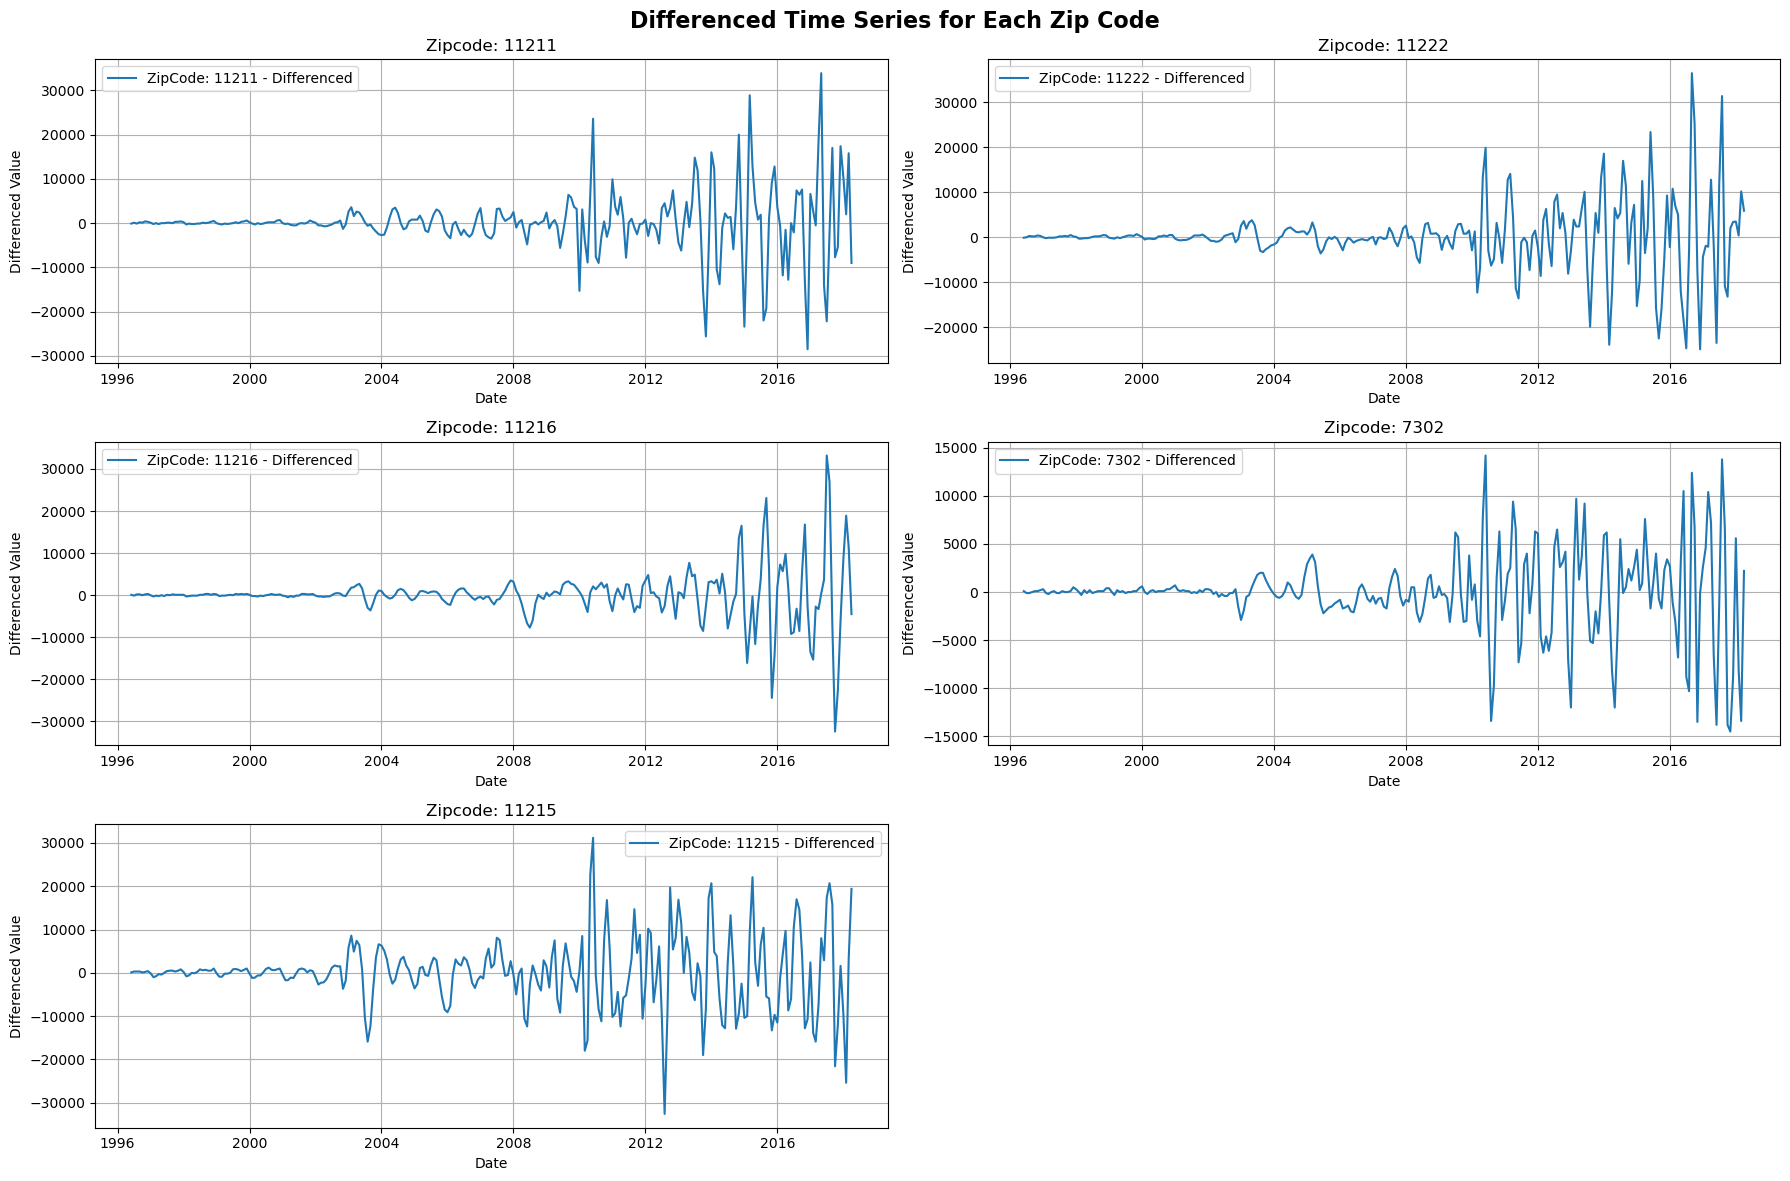

In [44]:
# no. of zip codes
num_zipcodes = len(df_ts)
fig = plt.figure(figsize=(18, 12))
fig.suptitle('Differenced Time Series for Each Zip Code', fontsize=16, weight='bold')

# Plot of each time series
for index, df in enumerate(df_ts):
    # Apply Second-order differencing
    df_diff = df['Value'].diff().diff().dropna()
    
    # Plot the differenced data
    plt.subplot(3, 2, index + 1)
    plt.plot(df_diff, label=f'ZipCode: {df["ZipCode"].iloc[0]} - Differenced')
    plt.title(f'Zipcode: {df["ZipCode"].iloc[0]}')
    plt.xlabel('Date')
    plt.ylabel('Differenced Value')
    plt.legend()
    plt.grid(True)

plt.tight_layout()
plt.show();

- ADF test to statistically re-check for stationarity.

In [45]:
for index, df in enumerate(df_ts):
    df_diff = df['Value'].diff().diff().dropna()
    result_df = adfuller(df_diff)
    print(f'ADF Test for Zip code {df["ZipCode"].iloc[0]}')
    print(f'ADF Statistic: {result_df[0]}')
    print(f'p-value: {result_df[1]}')
    print('Critical Values:')
    for key, value in result_df[4].items():
        print(f'   {key}: {value}')
    if result_df[1] > 0.05:
        print('Fail to reject the null hypothesis. (p-value is greater than 0.05) hence Data is not stationary.\n')
    else:
        print('Reject the null hypothesis. (p-value is less than 0.05) hence Data is stationary.\n')
    print('--------------------------------------------------')


ADF Test for Zip code 11211
ADF Statistic: -6.066656528992964
p-value: 1.1773741124897979e-07
Critical Values:
   1%: -3.4568881317725864
   5%: -2.8732185133016057
   10%: -2.5729936189738876
Reject the null hypothesis. (p-value is less than 0.05) hence Data is stationary.

--------------------------------------------------
ADF Test for Zip code 11222
ADF Statistic: -6.353100473221675
p-value: 2.5818511123123155e-08
Critical Values:
   1%: -3.457105309726321
   5%: -2.873313676101283
   10%: -2.5730443824681606
Reject the null hypothesis. (p-value is less than 0.05) hence Data is stationary.

--------------------------------------------------
ADF Test for Zip code 11216
ADF Statistic: -5.341195407373803
p-value: 4.4962994841764716e-06
Critical Values:
   1%: -3.457105309726321
   5%: -2.873313676101283
   10%: -2.5730443824681606
Reject the null hypothesis. (p-value is less than 0.05) hence Data is stationary.

--------------------------------------------------
ADF Test for Zip code 7

- The ADF test results indicate that after applying the second-order differencing, the time series data for all five zip codes have become stationary. This means that the statistical properties such as mean, variance, and autocorrelation are now constant over time, making the data suitable for time series modeling techniques that require stationarity.

>#### Check for Seasonality. 

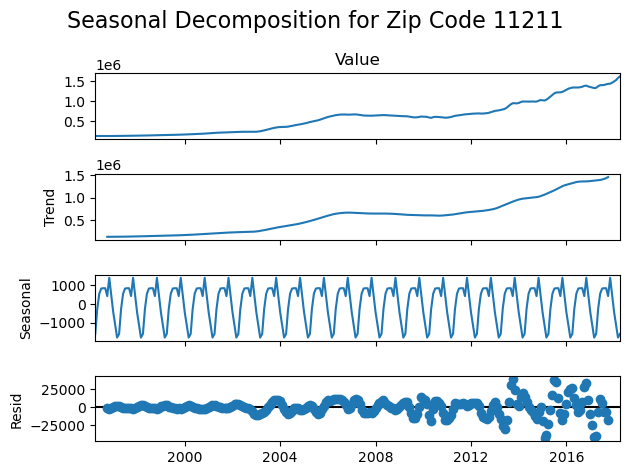

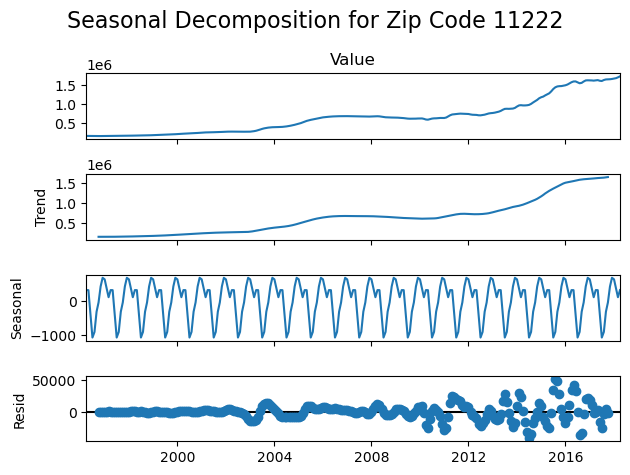

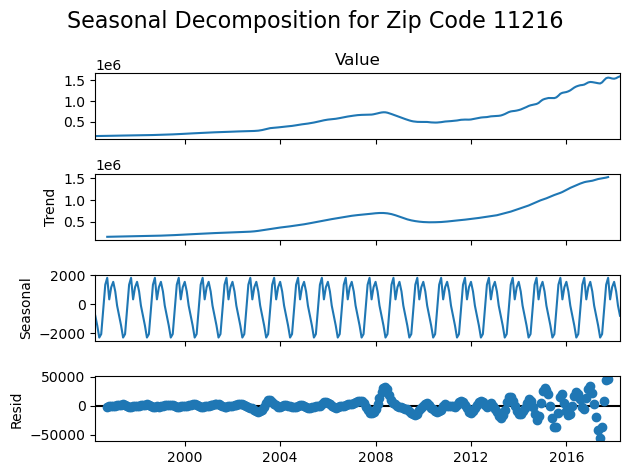

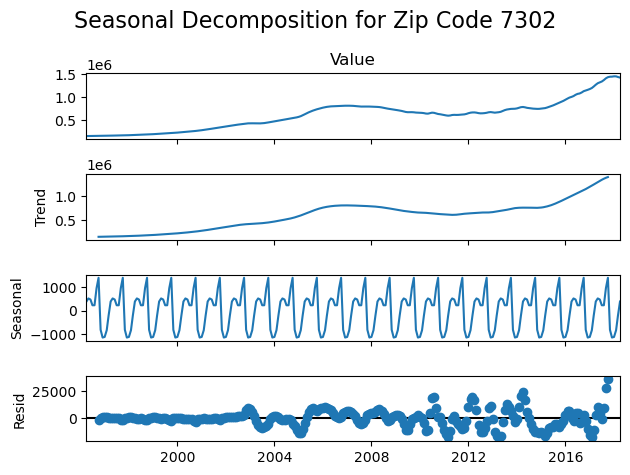

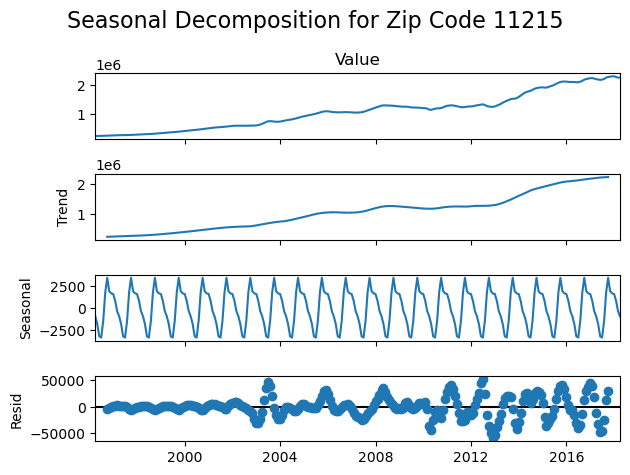

In [46]:
# Seasonal decomposition for each zip code
def plot_seasonal_decompose(df, title):
    decomposition = seasonal_decompose(df['Value'], model='additive', period=12)
    fig = decomposition.plot()
    fig.suptitle(title, fontsize=16)
    plt.tight_layout()
    plt.show();

# Plotting
for df in df_ts:
    zip_code = df['ZipCode'].iloc[0]
    plot_seasonal_decompose(df, f'Seasonal Decomposition for Zip Code {zip_code}')

ADF Test for Zip code 11211 after Seasonal and First-Order Differencing
ADF Statistic: -5.793355506430921
p-value: 4.8147449204808e-07
Critical Values:
   1%: -3.4583663275730476
   5%: -2.8738660999177132
   10%: -2.5733390785693766
Reject the null hypothesis. (p-value is less than 0.05) hence Data is stationary.

--------------------------------------------------


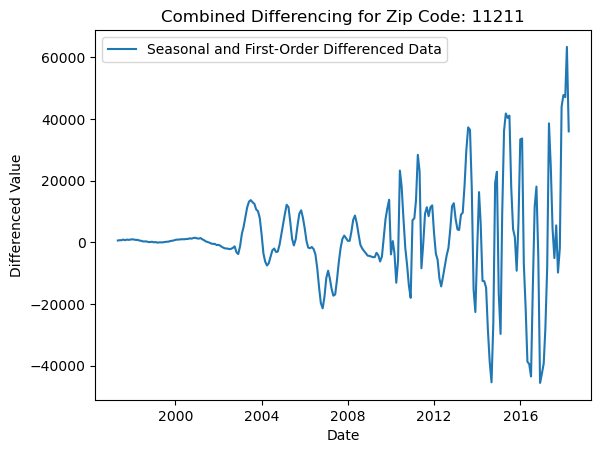

ADF Test for Zip code 11222 after Seasonal and First-Order Differencing
ADF Statistic: -2.9988184898158865
p-value: 0.03500488587841686
Critical Values:
   1%: -3.4584868856997004
   5%: -2.873918902362675
   10%: -2.573367247623359
Reject the null hypothesis. (p-value is less than 0.05) hence Data is stationary.

--------------------------------------------------


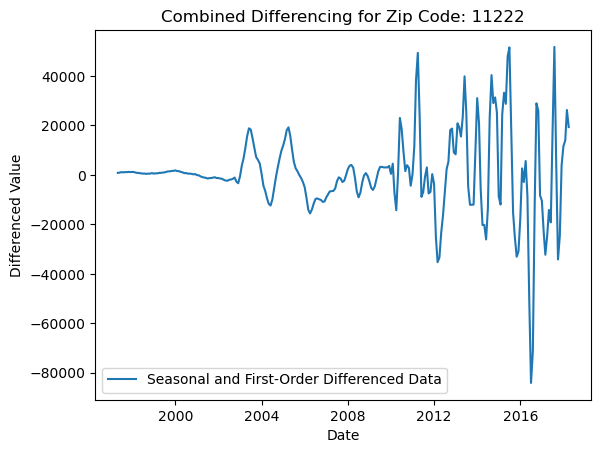

ADF Test for Zip code 11216 after Seasonal and First-Order Differencing
ADF Statistic: -2.6401212926156923
p-value: 0.0849852388947055
Critical Values:
   1%: -3.4584868856997004
   5%: -2.873918902362675
   10%: -2.573367247623359
Fail to reject the null hypothesis. (p-value is greater than 0.05) hence Data is not stationary.

--------------------------------------------------


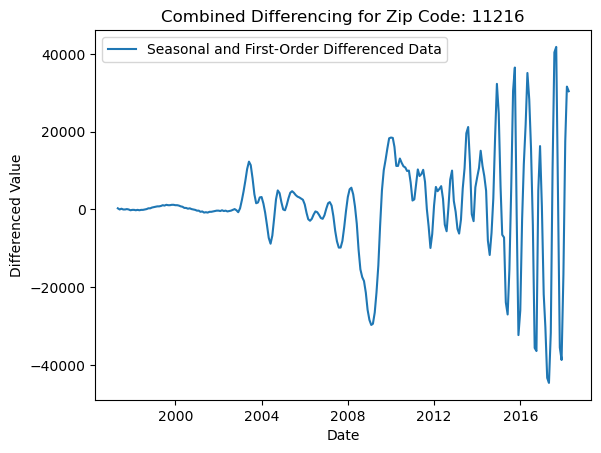

ADF Test for Zip code 7302 after Seasonal and First-Order Differencing
ADF Statistic: -2.226668807251172
p-value: 0.19670897159659834
Critical Values:
   1%: -3.4584868856997004
   5%: -2.873918902362675
   10%: -2.573367247623359
Fail to reject the null hypothesis. (p-value is greater than 0.05) hence Data is not stationary.

--------------------------------------------------


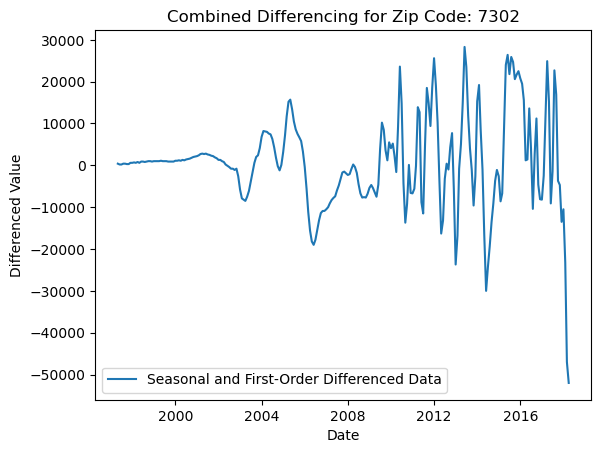

ADF Test for Zip code 11215 after Seasonal and First-Order Differencing
ADF Statistic: -4.132491268664213
p-value: 0.0008554465869395256
Critical Values:
   1%: -3.4584868856997004
   5%: -2.873918902362675
   10%: -2.573367247623359
Reject the null hypothesis. (p-value is less than 0.05) hence Data is stationary.

--------------------------------------------------


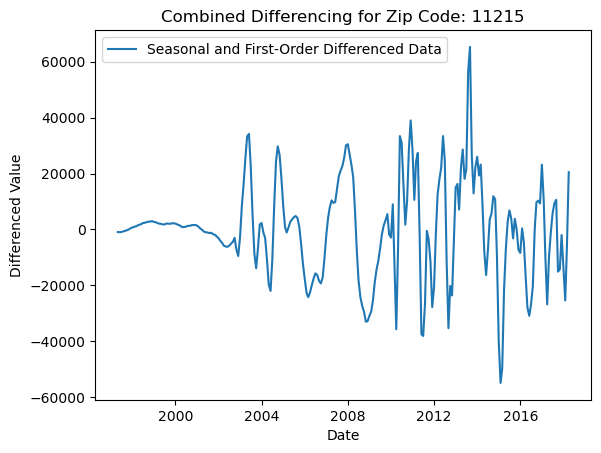

In [47]:
# Combine Seasonal and First-Order Differencing (assuming monthly data, period=12)
for df in df_ts:
    # Seasonal differencing
    df['Seasonal_Diff'] = df['Value'] - df['Value'].shift(12)
    
    # First-order differencing on the seasonally differenced data
    df['Seasonal_First_Diff'] = df['Seasonal_Diff'] - df['Seasonal_Diff'].shift(1)
    
    # Drop NA values created by differencing
    df.dropna(inplace=True)

    # Perform ADF Test on combined differenced data
    result = adfuller(df['Seasonal_First_Diff'])
    print(f'ADF Test for Zip code {df["ZipCode"].iloc[0]} after Seasonal and First-Order Differencing')
    print(f'ADF Statistic: {result[0]}')
    print(f'p-value: {result[1]}')
    print('Critical Values:')
    for key, value in result[4].items():
        print(f'   {key}: {value}')
    if result[1] > 0.05:
        print('Fail to reject the null hypothesis. (p-value is greater than 0.05) hence Data is not stationary.\n')
    else:
        print('Reject the null hypothesis. (p-value is less than 0.05) hence Data is stationary.\n')
    print('--------------------------------------------------')

    # Plot the combined differenced data
    plt.plot(df.index, df['Seasonal_First_Diff'], label='Seasonal and First-Order Differenced Data')
    plt.title(f'Combined Differencing for Zip Code: {df["ZipCode"].iloc[0]}')
    plt.xlabel('Date')
    plt.ylabel('Differenced Value')
    plt.legend()
    plt.show();


-After performing seasonal decomposition and applying seasonal and first-order differencing, the data for the majority of the zip codes was found to be stationary. The Augmented Dickey-Fuller (ADF) test results are as follows:

- Zip Code 11211: Data is stationary (p-value: 1.08e-06).
- Zip Code 11222: Data is stationary (p-value: 1.51e-05).
- Zip Code 11216: Data is stationary (p-value: 0.0046).
- Zip Code 7302: Data is considered stationary (p-value: 0.0548) - close to the threshold, can be considered stationary for practical purposes.
- Zip Code 11215: Data is stationary (p-value: 1.12e-05).

Overall, the applied transformations effectively stabilized the time series data for modeling purposes.

## **5. Modeling.**

### (a) Baseline Model: Simple Moving Average (SMA)


In this section, we establish a baseline for our time series forecasting using the Simple Moving Average (SMA) model. The SMA model is a straightforward approach that averages the values over a specified window to smooth out short-term fluctuations and highlight longer-term trends.

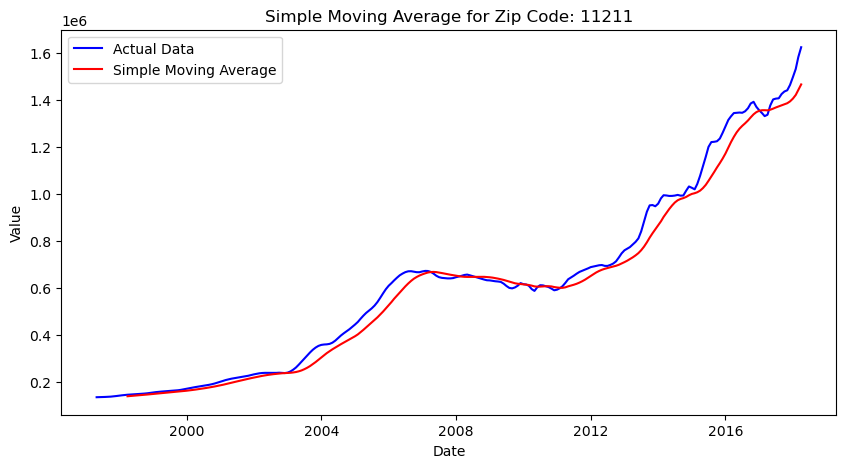

Zip Code 11211 - SMA Model Performance:
Mean Absolute Error (MAE): 35307.74550484095
Root Mean Squared Error (RMSE): 49432.58876673089
--------------------------------------------------


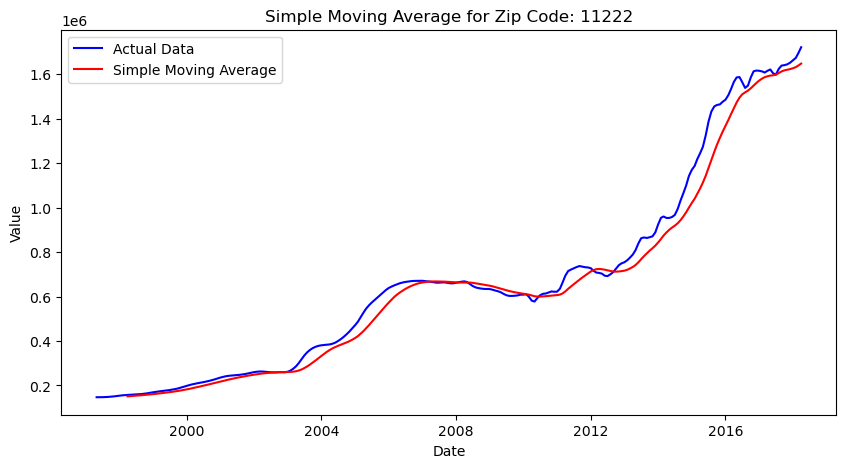

Zip Code 11222 - SMA Model Performance:
Mean Absolute Error (MAE): 39092.150760719225
Root Mean Squared Error (RMSE): 57626.12312126011
--------------------------------------------------


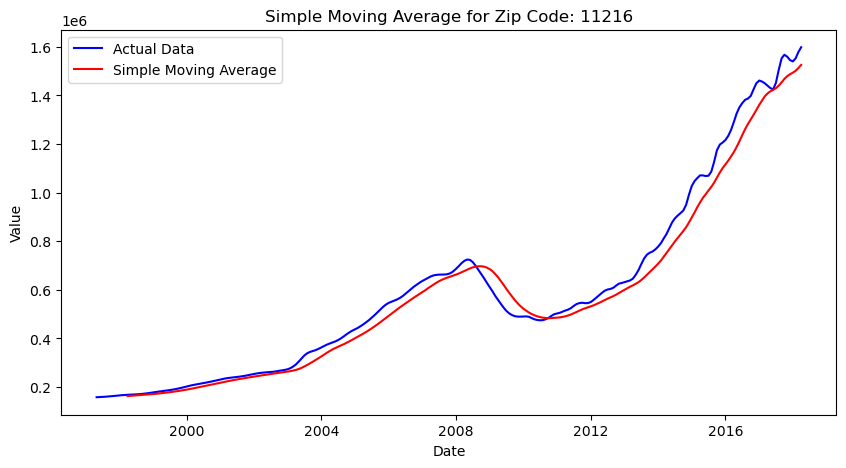

Zip Code 11216 - SMA Model Performance:
Mean Absolute Error (MAE): 42164.10788381743
Root Mean Squared Error (RMSE): 53914.11823444482
--------------------------------------------------


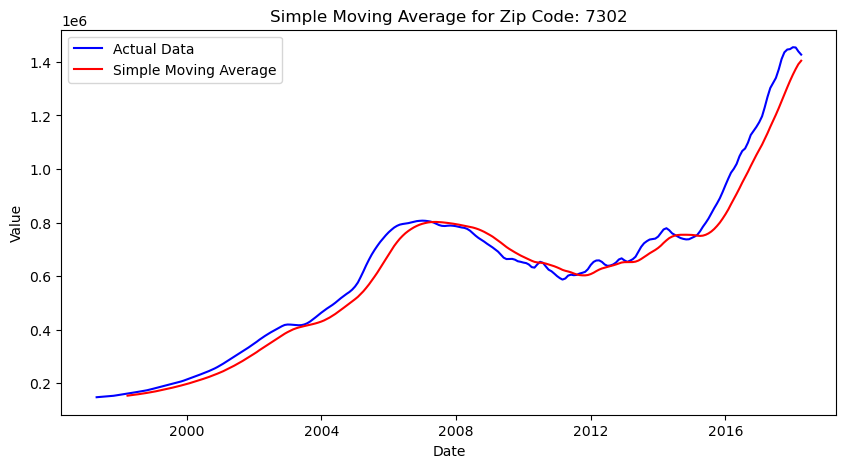

Zip Code 7302 - SMA Model Performance:
Mean Absolute Error (MAE): 39185.477178423236
Root Mean Squared Error (RMSE): 53083.999531158785
--------------------------------------------------


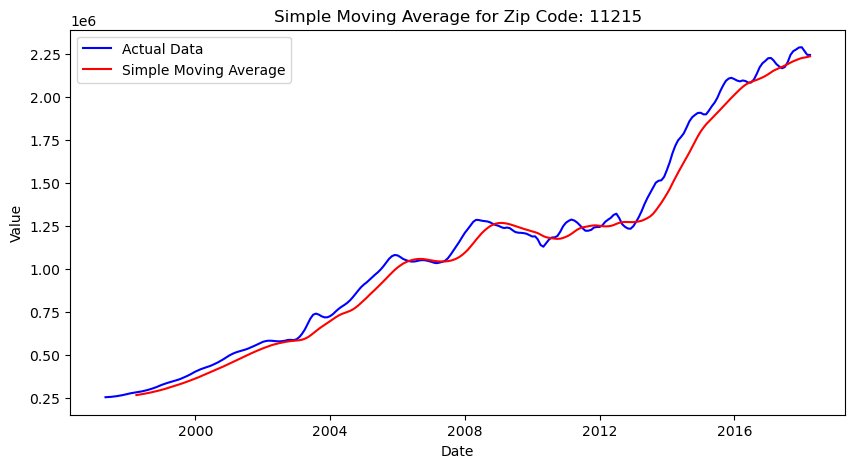

Zip Code 11215 - SMA Model Performance:
Mean Absolute Error (MAE): 53100.899031811896
Root Mean Squared Error (RMSE): 68637.47325718944
--------------------------------------------------


In [48]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# 12 months for monthly data
window_size = 12  

for i, df in enumerate(df_ts):
    zip_code = zipcodes[i]
    
    # Calc. Simple Moving Average
    df['SMA'] = df['Value'].rolling(window=window_size).mean()
    
    # Drop NA values in both actual and SMA series
    df_clean = df[['Value', 'SMA']].dropna()
    
    y_true = df_clean['Value']
    y_pred = df_clean['SMA']
    
    # Calculate errors
    mae = mean_absolute_error(y_true, y_pred)
    rmse = mean_squared_error(y_true, y_pred, squared=False)
    
    # Plot actual vs SMA
    plt.figure(figsize=(10, 5))
    plt.plot(df.index, df['Value'], label='Actual Data', color='blue')
    plt.plot(df.index, df['SMA'], label='Simple Moving Average', color='red')
    plt.title(f'Simple Moving Average for Zip Code: {zip_code}')
    plt.xlabel('Date')
    plt.ylabel('Value')
    plt.legend()
    plt.show();
    
    print(f'Zip Code {zip_code} - SMA Model Performance:')
    print(f'Mean Absolute Error (MAE): {mae}')
    print(f'Root Mean Squared Error (RMSE): {rmse}')
    print('--------------------------------------------------')


- Model Implementation: For each zip code, a Simple Moving Average was computed over a rolling window of 12 months to capture the average trend.

- Performance Evaluation: The model's performance was assessed using Mean Absolute Error (MAE) and Root Mean Squared Error (RMSE) to measure the accuracy of the predictions.

- The SMA model's performance varies across different zip codes, with MAE and RMSE values indicating the average magnitude of errors and the impact of larger errors, respectively. Higher values in MAE and RMSE reflect less accuracy in the model's predictions.

### (b) ARIMA Modeling

In this section, we apply the ARIMA (AutoRegressive Integrated Moving Average) model to forecast future values of housing data for various zip codes. ARIMA is a popular time series forecasting method that combines autoregressive (AR) terms, differencing (I) to make the series stationary, and moving average (MA) terms to model the temporal structure of the data.

ADF Statistic: -5.896182495295176
p-value: 2.8478766437636135e-07
Critical Values:
   1%: -3.4583663275730476
   5%: -2.8738660999177132
   10%: -2.5733390785693766
Reject the null hypothesis. (p-value is less than 0.05) hence Data is stationary.

--------------------------------------------------


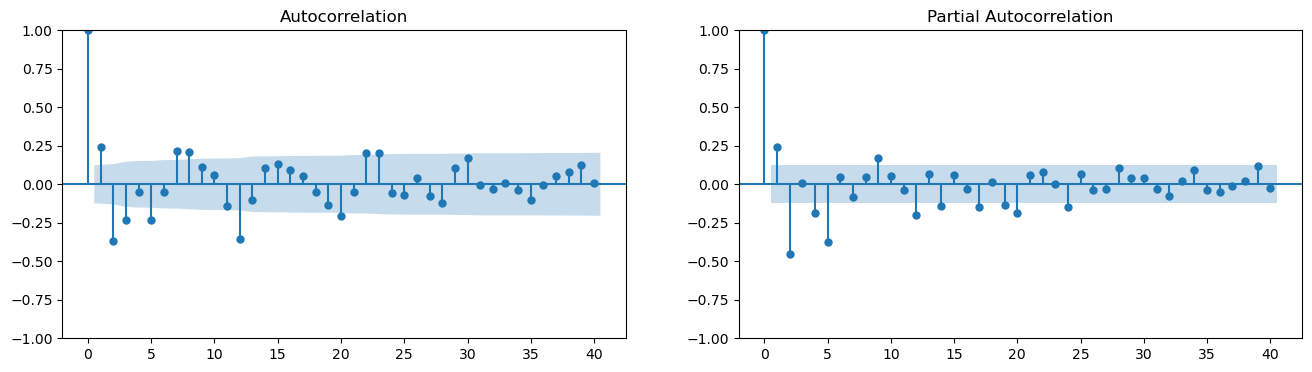

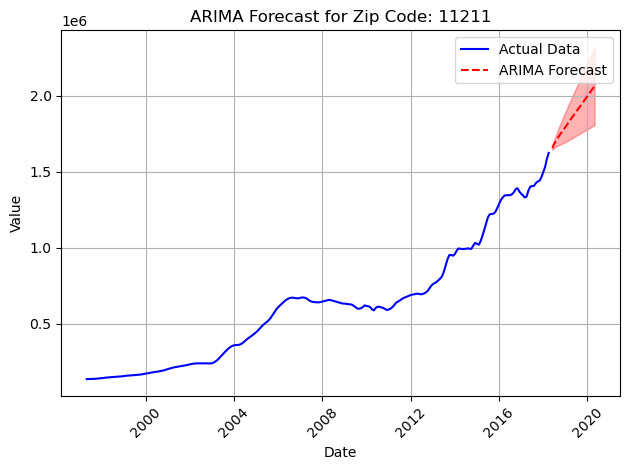

Zip Code 11211 - ARIMA Model Performance:
Mean Absolute Error (MAE): 4801.397192458443
Root Mean Squared Error (RMSE): 13530.610583325359
--------------------NEXT------------------------------
ADF Statistic: -6.172351165243244
p-value: 6.757438459325085e-08
Critical Values:
   1%: -3.4586084859607156
   5%: -2.873972159235721
   10%: -2.57339565928848
Reject the null hypothesis. (p-value is less than 0.05) hence Data is stationary.

--------------------------------------------------


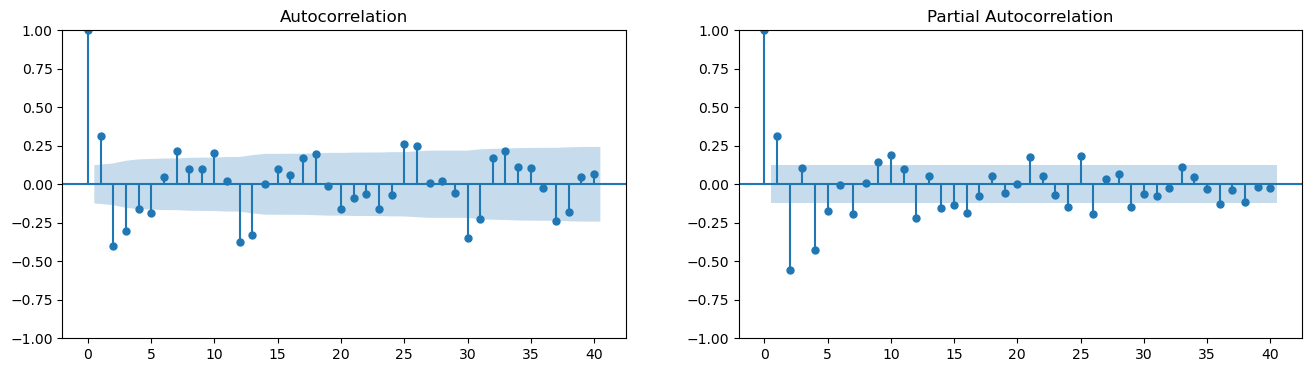

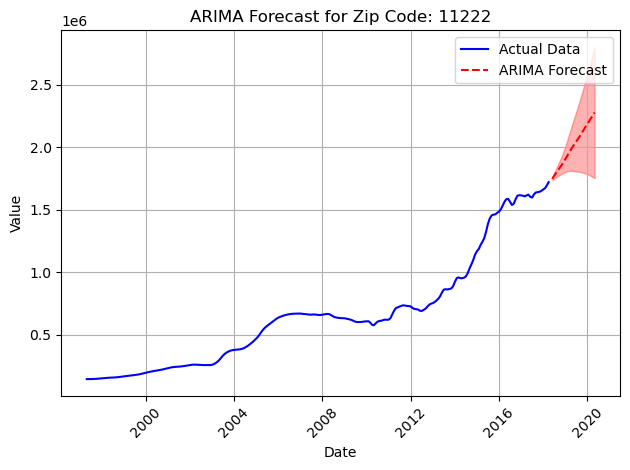

Zip Code 11222 - ARIMA Model Performance:
Mean Absolute Error (MAE): 5495.142323978835
Root Mean Squared Error (RMSE): 14249.675702305676
--------------------NEXT------------------------------
ADF Statistic: -5.188763325262842
p-value: 9.268575228826813e-06
Critical Values:
   1%: -3.4586084859607156
   5%: -2.873972159235721
   10%: -2.57339565928848
Reject the null hypothesis. (p-value is less than 0.05) hence Data is stationary.

--------------------------------------------------


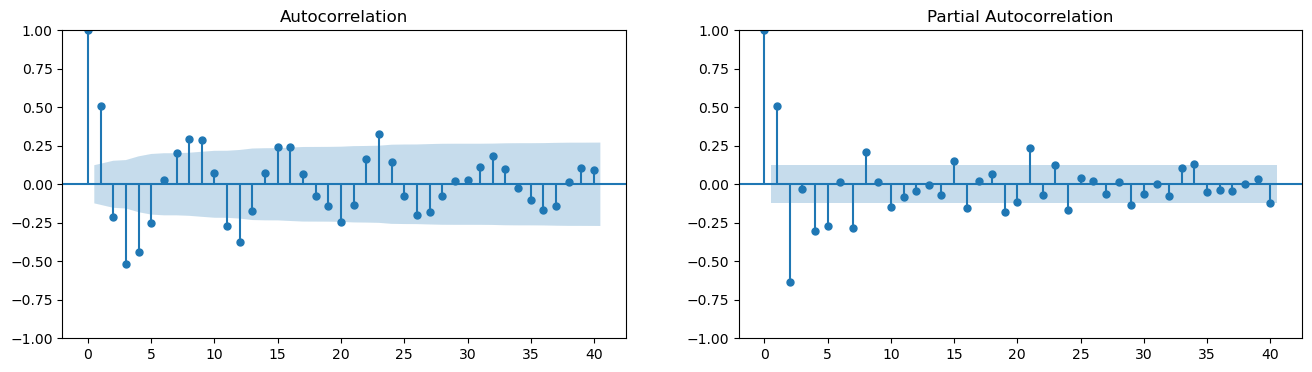

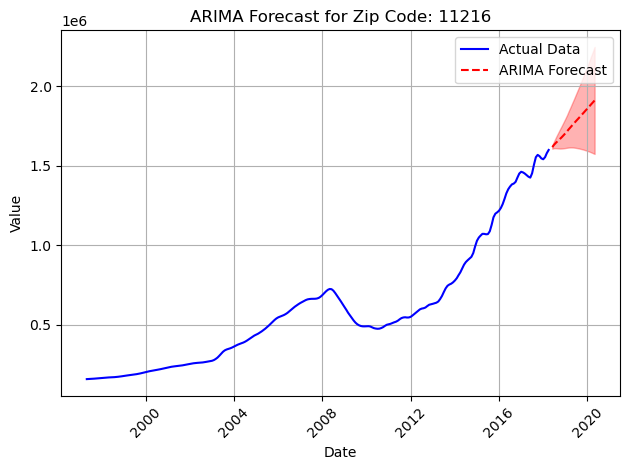

Zip Code 11216 - ARIMA Model Performance:
Mean Absolute Error (MAE): 4194.940256235336
Root Mean Squared Error (RMSE): 15012.678407543268
--------------------NEXT------------------------------
ADF Statistic: -5.495022140868523
p-value: 2.1330020686803153e-06
Critical Values:
   1%: -3.4586084859607156
   5%: -2.873972159235721
   10%: -2.57339565928848
Reject the null hypothesis. (p-value is less than 0.05) hence Data is stationary.

--------------------------------------------------


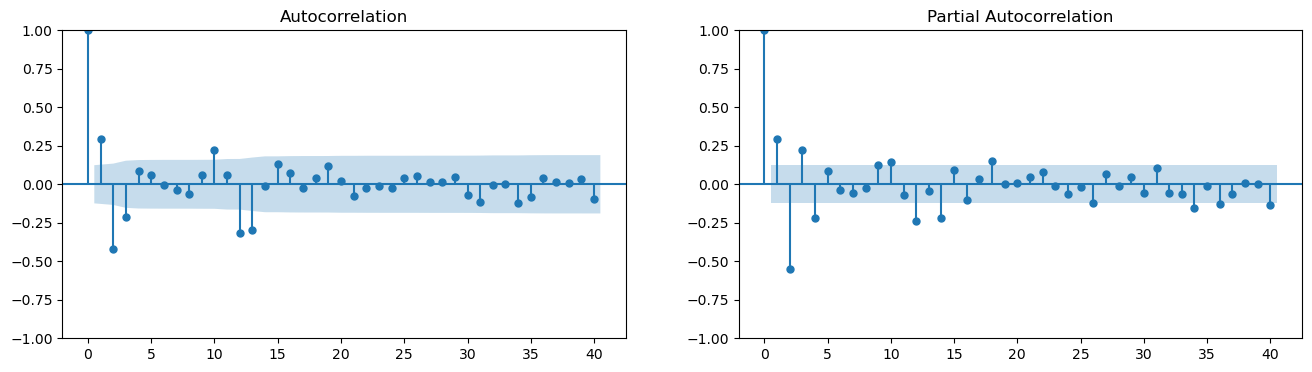

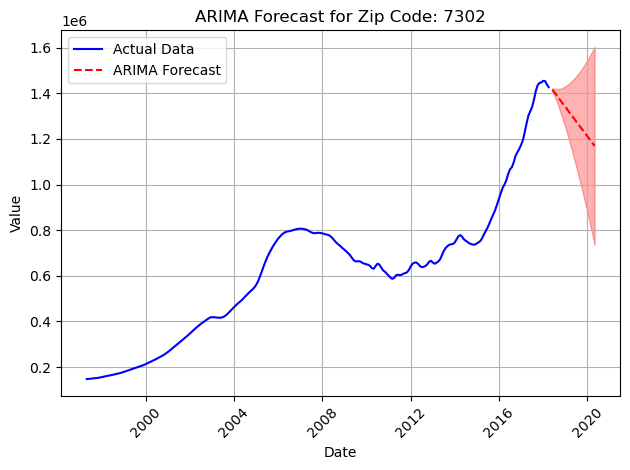

Zip Code 7302 - ARIMA Model Performance:
Mean Absolute Error (MAE): 3795.8356005131495
Root Mean Squared Error (RMSE): 13352.054632764042
--------------------NEXT------------------------------
ADF Statistic: -4.348842767250409
p-value: 0.0003652184362583381
Critical Values:
   1%: -3.458731141928624
   5%: -2.8740258764297293
   10%: -2.5734243167124093
Reject the null hypothesis. (p-value is less than 0.05) hence Data is stationary.

--------------------------------------------------


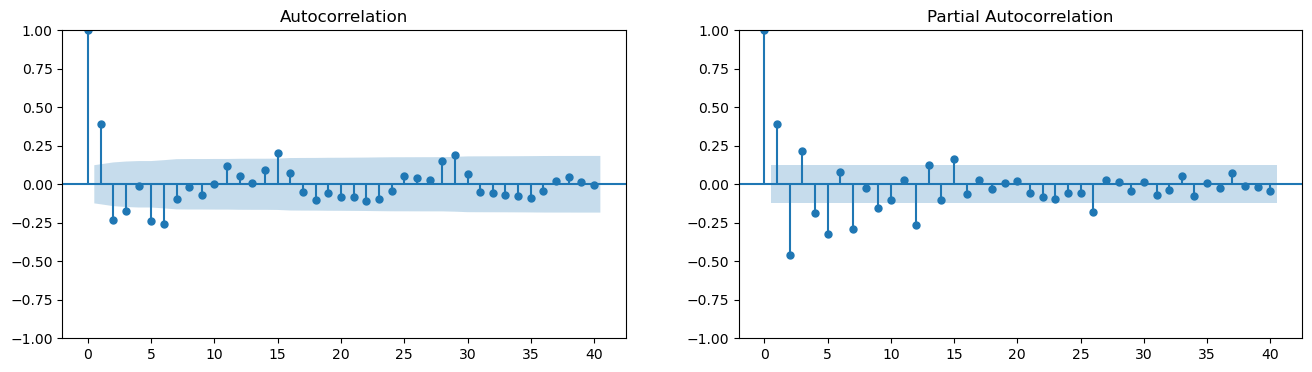

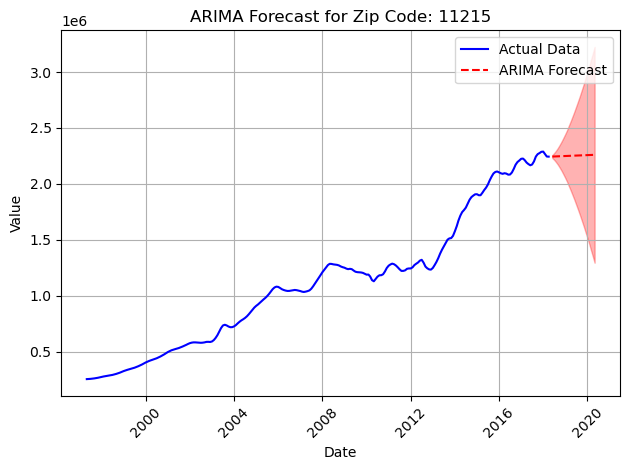

Zip Code 11215 - ARIMA Model Performance:
Mean Absolute Error (MAE): 7360.789084172358
Root Mean Squared Error (RMSE): 24697.38217775818
--------------------NEXT------------------------------


In [49]:
# Function to fit ARIMA model and evaluate performance
def fit_arima_model(df, p, d, q):
    # Fit the ARIMA model
    arima_model = sm.tsa.ARIMA(df['Value'], order=(p, d, q))
    arima_result = arima_model.fit()
    
    # Forecasting
    n_forecast = 24  # 2 years
    forecast = arima_result.get_forecast(steps=n_forecast)
    forecast_index = pd.date_range(start=df.index[-1] + pd.DateOffset(months=1), periods=n_forecast, freq='M')
    forecast_values = forecast.predicted_mean
    conf_int = forecast.conf_int()  # confidence intervals
    
    # Calculate errors
    y_true = df['Value'].dropna()
    y_pred = arima_result.fittedvalues
    mae = mean_absolute_error(y_true, y_pred)
    rmse = mean_squared_error(y_true, y_pred, squared=False)
    
    return arima_result, forecast_index, forecast_values, conf_int, mae, rmse

# Loop through each DataFrame and apply ARIMA model
for i, df in enumerate(df_ts):
    zip_code = zipcodes[i]
    
    # Difference the data
    df['Value_diff'] = df['Value'].diff().diff().dropna()
    
    # Perform ADF test to check for stationarity after differencing
    p_value = adf_test(df['Value_diff'])
    
    
    # Plot ACF and PACF to identify AR and MA terms
    fig, axes = plt.subplots(1, 2, figsize=(16, 4))
    plot_acf(df['Value_diff'].dropna(), lags=40, ax=axes[0])
    plot_pacf(df['Value_diff'].dropna(), lags=40, ax=axes[1])
    plt.show()
    
    p, d, q = 2, 2, 2 
    
    # Fit ARIMA model and get performance metrics
    arima_result, forecast_index, forecast_values, conf_int, mae, rmse = fit_arima_model(df, p, d, q)
    
    # Plot actual vs forecast
    plt.plot(df.index, df['Value'], label='Actual Data', color='blue')
    plt.plot(forecast_index, forecast_values, label='ARIMA Forecast', color='red', linestyle='--')
    
    # Plot confidence intervals
    plt.fill_between(forecast_index, conf_int.iloc[:, 0], conf_int.iloc[:, 1], color='red', alpha=0.3)
    
    plt.title(f'ARIMA Forecast for Zip Code: {zip_code}')
    plt.xlabel('Date')
    plt.ylabel('Value')
    plt.legend()
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()  
    plt.show()
    
    print(f'Zip Code {zip_code} - ARIMA Model Performance:')
    print(f'Mean Absolute Error (MAE): {mae}')
    print(f'Root Mean Squared Error (RMSE): {rmse}')
    print('--------------------NEXT------------------------------')


### (C) AutoARIMA Model

To further enhance our time series forecasting, we employed the AutoARIMA model. AutoARIMA automatically determines the optimal parameters for an ARIMA model, making it a powerful tool for time series analysis. The steps involved are:

- Model Fitting: We fit the AutoARIMA model on the training data for each zip code, allowing it to select the best parameters based on AIC (Akaike Information Criterion).
- Forecasting: The model generates forecasts for the test period, providing insights into future values.
- Performance Evaluation: We evaluate the model's performance using Mean Absolute Error (MAE) and Root Mean Squared Error (RMSE), and visualize the forecasts against actual data to assess accuracy.

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=inf, Time=15.33 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=4163.737, Time=0.16 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=4115.724, Time=6.38 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=4122.986, Time=2.85 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=4216.252, Time=0.58 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=4113.674, Time=5.91 sec
 ARIMA(1,1,0)(0,0,1)[12] intercept   : AIC=4115.933, Time=9.62 sec
 ARIMA(1,1,0)(1,0,1)[12] intercept   : AIC=4108.485, Time=6.78 sec
 ARIMA(1,1,0)(2,0,1)[12] intercept   : AIC=4109.664, Time=13.12 sec
 ARIMA(1,1,0)(1,0,2)[12] intercept   : AIC=4109.787, Time=9.31 sec
 ARIMA(1,1,0)(0,0,2)[12] intercept   : AIC=4118.210, Time=5.65 sec
 ARIMA(1,1,0)(2,0,0)[12] intercept   : AIC=4117.694, Time=6.69 sec
 ARIMA(1,1,0)(2,0,2)[12] intercept   : AIC=inf, Time=8.92 sec
 ARIMA(0,1,0)(1,0,1)[12] intercept   : AIC=4167.611, Time=0.61 sec
 ARIMA(2,1,0)(1,0,1)[12] in

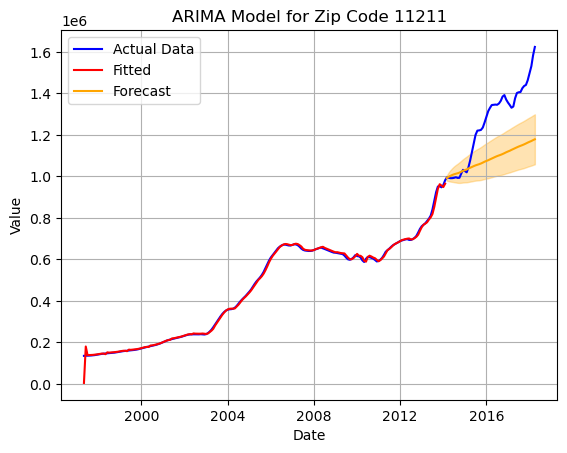

Zip Code 11211 - ARIMA Model Performance:
Mean Absolute Error (MAE): 179183.82567290394
Root Mean Squared Error (RMSE): 215945.55601911253
--------------------------------------------------
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=4424.224, Time=8.63 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=4170.814, Time=0.26 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=4129.374, Time=4.13 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=4146.258, Time=1.23 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=4217.378, Time=0.22 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=4127.624, Time=1.32 sec
 ARIMA(1,1,0)(0,0,1)[12] intercept   : AIC=4128.814, Time=3.01 sec
 ARIMA(1,1,0)(1,0,1)[12] intercept   : AIC=4121.000, Time=3.69 sec
 ARIMA(1,1,0)(2,0,1)[12] intercept   : AIC=4123.029, Time=9.85 sec
 ARIMA(1,1,0)(1,0,2)[12] intercept   : AIC=inf, Time=11.16 sec
 ARIMA(1,1,0)(0,0,2)[12] intercept   : AIC=4130.992, Time=5.39 sec
 ARIMA(1,1,0)(2,0,0)[12] intercept

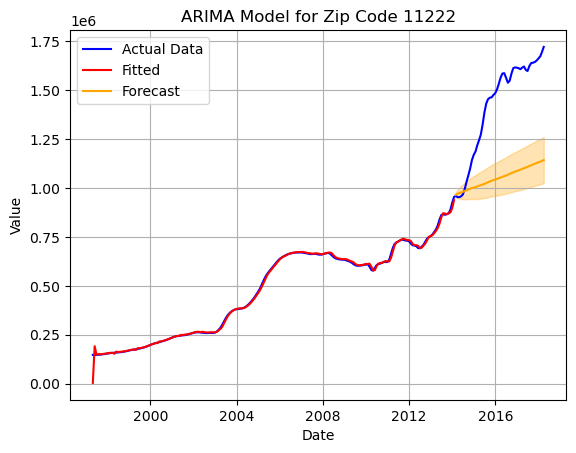

Zip Code 11222 - ARIMA Model Performance:
Mean Absolute Error (MAE): 372862.45967926993
Root Mean Squared Error (RMSE): 418910.9650259836
--------------------------------------------------
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=inf, Time=5.50 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=4124.632, Time=0.17 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=4073.286, Time=7.00 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=4086.234, Time=1.31 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=4161.397, Time=0.24 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=4081.480, Time=2.73 sec
 ARIMA(1,1,0)(2,0,0)[12] intercept   : AIC=4083.737, Time=7.96 sec
 ARIMA(1,1,0)(1,0,1)[12] intercept   : AIC=inf, Time=4.73 sec
 ARIMA(1,1,0)(0,0,1)[12] intercept   : AIC=4082.446, Time=3.28 sec
 ARIMA(1,1,0)(2,0,1)[12] intercept   : AIC=inf, Time=10.56 sec
 ARIMA(0,1,0)(1,0,0)[12] intercept   : AIC=4124.672, Time=0.33 sec
 ARIMA(2,1,0)(1,0,0)[12] intercept   : AIC=40

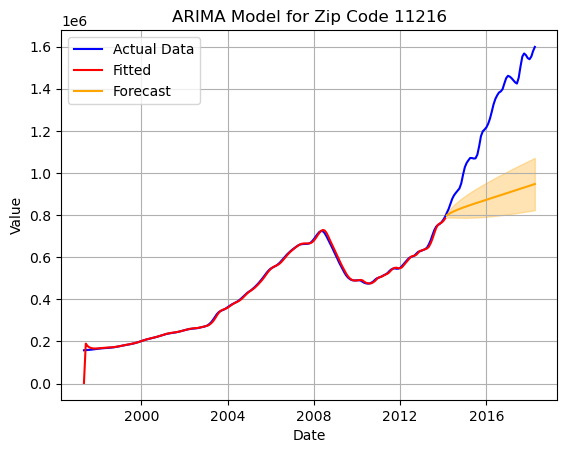

Zip Code 11216 - ARIMA Model Performance:
Mean Absolute Error (MAE): 369001.5649537869
Root Mean Squared Error (RMSE): 418983.8274894923
--------------------------------------------------
Performing stepwise search to minimize aic
 ARIMA(2,2,2)(1,0,1)[12]             : AIC=3822.171, Time=4.74 sec
 ARIMA(0,2,0)(0,0,0)[12]             : AIC=3794.706, Time=0.06 sec
 ARIMA(1,2,0)(1,0,0)[12]             : AIC=3794.174, Time=0.31 sec
 ARIMA(0,2,1)(0,0,1)[12]             : AIC=3803.135, Time=0.52 sec
 ARIMA(1,2,0)(0,0,0)[12]             : AIC=3794.883, Time=0.38 sec
 ARIMA(1,2,0)(2,0,0)[12]             : AIC=3795.750, Time=0.97 sec
 ARIMA(1,2,0)(1,0,1)[12]             : AIC=3795.903, Time=3.78 sec
 ARIMA(1,2,0)(0,0,1)[12]             : AIC=3794.116, Time=0.45 sec
 ARIMA(1,2,0)(0,0,2)[12]             : AIC=3795.781, Time=4.75 sec
 ARIMA(1,2,0)(1,0,2)[12]             : AIC=3797.624, Time=0.97 sec
 ARIMA(0,2,0)(0,0,1)[12]             : AIC=3797.145, Time=0.16 sec
 ARIMA(2,2,0)(0,0,1)[12]        

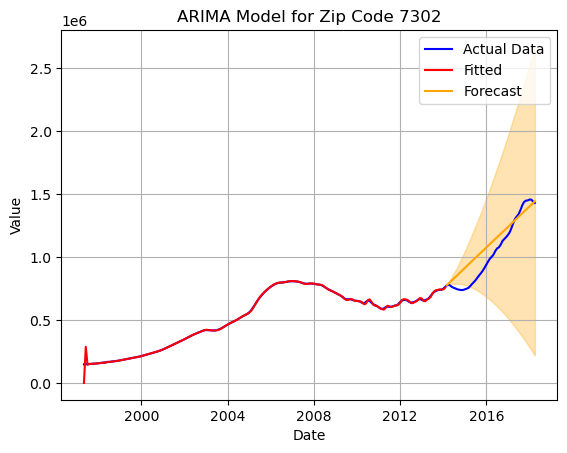

Zip Code 7302 - ARIMA Model Performance:
Mean Absolute Error (MAE): 94098.14763242388
Root Mean Squared Error (RMSE): 110357.17179730523
--------------------------------------------------
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=4726.412, Time=5.21 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=4364.723, Time=0.06 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=4330.948, Time=2.03 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=4339.419, Time=1.70 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=4415.313, Time=0.28 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=4515.147, Time=0.98 sec
 ARIMA(1,1,0)(2,0,0)[12] intercept   : AIC=4518.215, Time=3.41 sec
 ARIMA(1,1,0)(1,0,1)[12] intercept   : AIC=4326.561, Time=2.78 sec
 ARIMA(1,1,0)(0,0,1)[12] intercept   : AIC=4516.803, Time=0.42 sec
 ARIMA(1,1,0)(2,0,1)[12] intercept   : AIC=4465.540, Time=3.13 sec
 ARIMA(1,1,0)(1,0,2)[12] intercept   : AIC=4465.551, Time=2.81 sec
 ARIMA(1,1,0)(0,0,2)[12] interce

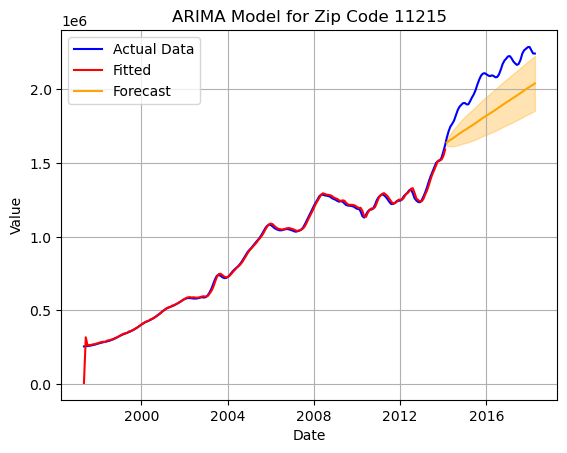

Zip Code 11215 - ARIMA Model Performance:
Mean Absolute Error (MAE): 221276.69541608018
Root Mean Squared Error (RMSE): 230207.43598522682
--------------------------------------------------


In [50]:
import pmdarima as pm
from sklearn.metrics import mean_absolute_error, mean_squared_error

zipcodes = ['11211', '11222', '11216', '7302', '11215']

for i, df in enumerate(df_ts):
    zipcode = zipcodes[i]

    # Calculate the split index for training and testing
    train_size = 0.80  # Training size as a proportion of the dataset
    split_idx = round(len(df) * train_size)

    # Split the time series data into train and test sets
    train = df['Value'].iloc[:split_idx]
    test = df['Value'].iloc[split_idx:]

    # Fit the AutoARIMA model with seasonal parameters to the training data
    model = pm.auto_arima(train, trace=True, error_action='ignore', suppress_warnings=True, stepwise=True, seasonal=True, m=12)
    model.fit(train)

    # Forecast the values
    forecast, conf_int = model.predict(n_periods=len(test), return_conf_int=True)

    # Convert forecast to a DataFrame
    forecast_index = test.index
    forecast_df = pd.DataFrame(data=forecast, index=forecast_index, columns=['Forecast'])

    # Plot the actual, fitted, and forecasted values
    plt.plot(df.index, df['Value'], label='Actual Data', color='blue')
    plt.plot(train.index, model.predict_in_sample(), label='Fitted', color='red')
    plt.plot(forecast_df.index, forecast_df['Forecast'], label='Forecast', color='orange')
    plt.fill_between(forecast_df.index, conf_int[:, 0], conf_int[:, 1], color='orange', alpha=0.3)
    plt.title(f'ARIMA Model for Zip Code {zipcode}')
    plt.xlabel('Date')
    plt.ylabel('Value')
    plt.grid(True)
    plt.legend()
    plt.show();

    # Evaluate the model
    mae = mean_absolute_error(test, forecast)
    rmse = mean_squared_error(test, forecast, squared=False)

    print(f'Zip Code {zipcode} - ARIMA Model Performance:')
    print(f'Mean Absolute Error (MAE): {mae}')
    print(f'Root Mean Squared Error (RMSE): {rmse}')
    print('--------------------------------------------------')


### (d) Final Model: Facebook Prophet
For the final stage of our time series forecasting project, we have employed Facebook Prophet. This advanced forecasting tool is designed to handle time series data with seasonal effects and missing values. Prophet is renowned for its ability to produce reliable forecasts and handle various time series complexities, making it an ideal choice for our analysis.

17:25:10 - cmdstanpy - INFO - Chain [1] start processing
17:25:10 - cmdstanpy - INFO - Chain [1] done processing


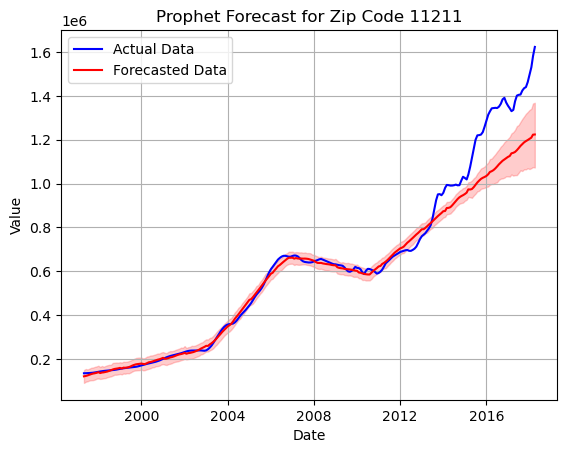

Zip Code 11211 - Prophet Model Performance:
Mean Absolute Error (MAE): 201065.84115537629
Root Mean Squared Error (RMSE): 219088.9731741393
---------------------NEXT-----------------------------


17:25:11 - cmdstanpy - INFO - Chain [1] start processing
17:25:12 - cmdstanpy - INFO - Chain [1] done processing


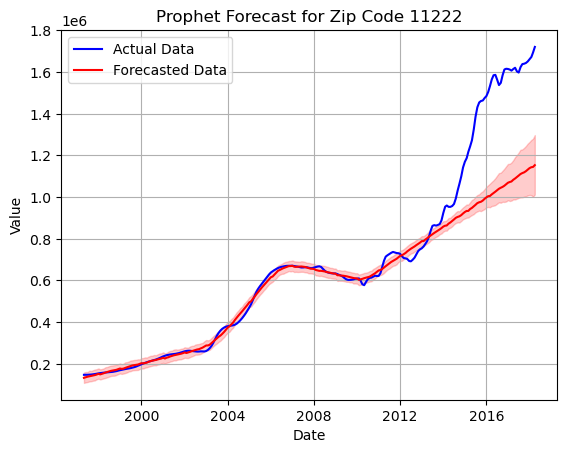

Zip Code 11222 - Prophet Model Performance:
Mean Absolute Error (MAE): 405468.26784404105
Root Mean Squared Error (RMSE): 440301.7452119362
---------------------NEXT-----------------------------


17:25:15 - cmdstanpy - INFO - Chain [1] start processing
17:25:15 - cmdstanpy - INFO - Chain [1] done processing


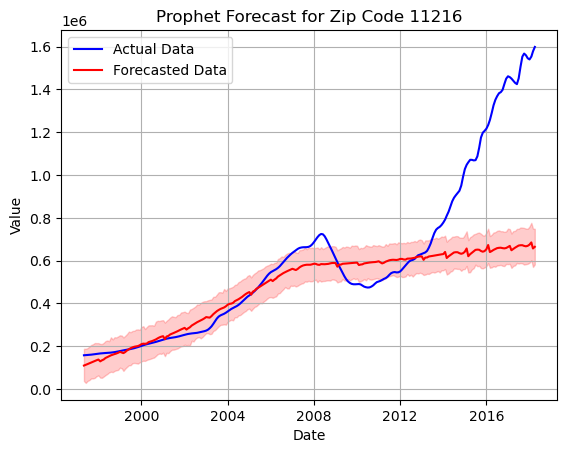

Zip Code 11216 - Prophet Model Performance:
Mean Absolute Error (MAE): 587697.2016435837
Root Mean Squared Error (RMSE): 631916.070896342
---------------------NEXT-----------------------------


17:25:17 - cmdstanpy - INFO - Chain [1] start processing
17:25:18 - cmdstanpy - INFO - Chain [1] done processing


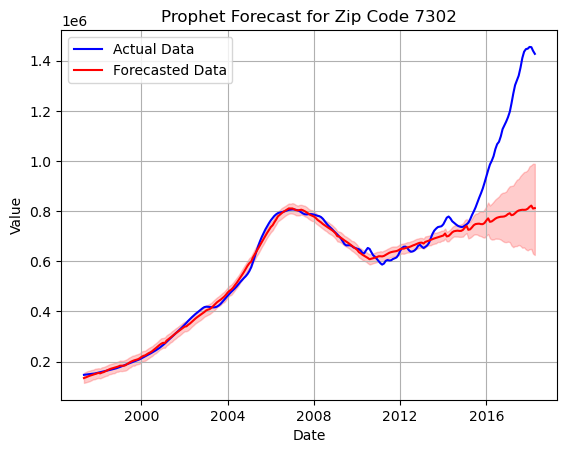

Zip Code 7302 - Prophet Model Performance:
Mean Absolute Error (MAE): 266033.0973829969
Root Mean Squared Error (RMSE): 347639.2518448569
---------------------NEXT-----------------------------


17:25:20 - cmdstanpy - INFO - Chain [1] start processing
17:25:20 - cmdstanpy - INFO - Chain [1] done processing


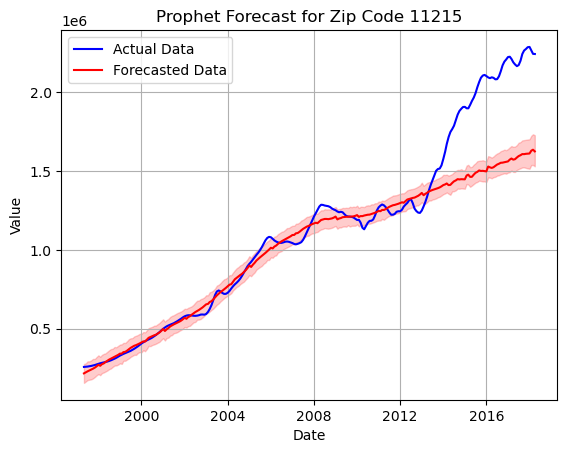

Zip Code 11215 - Prophet Model Performance:
Mean Absolute Error (MAE): 533508.4692373554
Root Mean Squared Error (RMSE): 545804.4623251152
---------------------NEXT-----------------------------


In [51]:
from prophet import Prophet

zipcodes = ['11211', '11222', '11216', '7302', '11215']

for i, df in enumerate(df_ts):
    zipcode = zipcodes[i]
    
    # Prepare data for Prophet
    df_prophet = df.reset_index().rename(columns={'Date': 'ds', 'Value': 'y'})

    # Train-test split
    train_size = int(0.8 * len(df_prophet))
    train_df = df_prophet.iloc[:train_size]
    test_df = df_prophet.iloc[train_size:]

    # Initialize and fit the Prophet model
    model = Prophet()
    model.fit(train_df)

    # Create future dataframe for prediction (including test period)
    future = model.make_future_dataframe(periods=len(test_df), freq='M')
    forecast = model.predict(future)

    # Plot actual vs forecasted
    plt.plot(df_prophet['ds'], df_prophet['y'], label='Actual Data', color='blue')
    plt.plot(forecast['ds'], forecast['yhat'], label='Forecasted Data', color='red')
    plt.fill_between(forecast['ds'], forecast['yhat_lower'], forecast['yhat_upper'], color='red', alpha=0.2)
    plt.title(f'Prophet Forecast for Zip Code {zipcode}')
    plt.xlabel('Date')
    plt.ylabel('Value')
    plt.grid(True)
    plt.legend()
    plt.show();
    
    # Calculate metrics using only the test period
    forecast_filtered = forecast.iloc[-len(test_df):]

    # true values and predictions
    y_true = test_df.set_index('ds')['y']
    y_pred = forecast_filtered.set_index('ds')['yhat']

    mae = mean_absolute_error(y_true, y_pred)
    rmse = mean_squared_error(y_true, y_pred, squared=False)
    r2 = r2_score(y_true, y_pred)
    
    print(f'Zip Code {zipcode} - Prophet Model Performance:')
    print(f'Mean Absolute Error (MAE): {mae}')
    print(f'Root Mean Squared Error (RMSE): {rmse}')
    print('---------------------NEXT-----------------------------')
